In [7]:
#load and vis a few seqmented images in the images_CNN folder
import os
import glob
import h5py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image, ImageSequence
img_list = glob.glob('images_CNN/F?_im.TIF')+glob.glob('images_CNN/F??_im.TIF')
img_list = sorted(img_list)
mask_list = glob.glob('images_CNN/F*_mask.h5')
mask_list = sorted(mask_list)
fluo_gfp = glob.glob('images_CNN/*GFP_im.TIF')
fluo_gfp = sorted(fluo_gfp) 
fluo_rfp = glob.glob('images_CNN/*RFP_im.TIF')
fluo_rfp = sorted(fluo_rfp)
print( len(img_list), len(mask_list) , len(fluo_gfp), len(fluo_rfp  )   )
dataset = {}
for i in range(len(img_list)):
    dataset[i] = { 'img': img_list[i], 'mask': mask_list[i], 'gfp': fluo_gfp[i], 'rfp': fluo_rfp[i]  }
print(dataset)

11 11 11 11
{0: {'img': 'images_CNN/F10_im.TIF', 'mask': 'images_CNN/F10_mask.h5', 'gfp': 'images_CNN/F10_GFP_im.TIF', 'rfp': 'images_CNN/F10_RFP_im.TIF'}, 1: {'img': 'images_CNN/F11_im.TIF', 'mask': 'images_CNN/F11_mask.h5', 'gfp': 'images_CNN/F11_GFP_im.TIF', 'rfp': 'images_CNN/F11_RFP_im.TIF'}, 2: {'img': 'images_CNN/F1_im.TIF', 'mask': 'images_CNN/F1_mask.h5', 'gfp': 'images_CNN/F1_GFP_im.TIF', 'rfp': 'images_CNN/F1_RFP_im.TIF'}, 3: {'img': 'images_CNN/F2_im.TIF', 'mask': 'images_CNN/F2_mask.h5', 'gfp': 'images_CNN/F2_GFP_im.TIF', 'rfp': 'images_CNN/F2_RFP_im.TIF'}, 4: {'img': 'images_CNN/F3_im.TIF', 'mask': 'images_CNN/F3_mask.h5', 'gfp': 'images_CNN/F3_GFP_im.TIF', 'rfp': 'images_CNN/F3_RFP_im.TIF'}, 5: {'img': 'images_CNN/F4_im.TIF', 'mask': 'images_CNN/F4_mask.h5', 'gfp': 'images_CNN/F4_GFP_im.TIF', 'rfp': 'images_CNN/F4_RFP_im.TIF'}, 6: {'img': 'images_CNN/F5_im.TIF', 'mask': 'images_CNN/F5_mask.h5', 'gfp': 'images_CNN/F5_GFP_im.TIF', 'rfp': 'images_CNN/F5_RFP_im.TIF'}, 7: {'i

In [8]:
images = glob.glob('images_CNN/BF??_Position*.tif')
rfp = glob.glob('images_CNN/RFP*.tif')
gfp = glob.glob('images_CNN/GFP*.tif')
masks = glob.glob('images_CNN/BF*_mask.h5')

print(images)
print(rfp)
print(gfp)
print(masks)

rfp = { int(n.split('/')[-1].split('_')[1].replace('Position','').replace('.tif', '')):n for n in rfp }
gfp = { int(n.split('/')[-1].split('_')[1].replace('Position','').replace('.tif', '')):n for n in gfp }
masks = { int(n.split('/')[-1].split('_')[1].replace('Position','')):n for n in masks }
images = { int(n.split('/')[-1].split('_')[1].replace('Position','').replace('.tif', '')):n for n in images }

print(images)
print(rfp)
print(gfp)
print(masks)

dataset2 = {}
for i in images:
    dataset2[i] = { 'img': images[i], 'mask': masks[i], 'gfp': gfp[i], 'rfp': rfp[i]  }

['images_CNN/BF01_Position001.tif', 'images_CNN/BF04_Position005.tif', 'images_CNN/BF02_Position016.tif', 'images_CNN/BF03_Position020.tif', 'images_CNN/BF02_Position023.tif', 'images_CNN/BF04_Position010.tif', 'images_CNN/BF03_Position018.tif', 'images_CNN/BF03_Position025.tif', 'images_CNN/BF04_Position006.tif', 'images_CNN/BF03_Position017.tif', 'images_CNN/BF03_Position013.tif', 'images_CNN/BF01_Position002.tif', 'images_CNN/BF03_Position019.tif', 'images_CNN/BF04_Position008.tif']
['images_CNN/RFP04_Position006.tif', 'images_CNN/RFP02_Position023.tif', 'images_CNN/RFP01_Position001.tif', 'images_CNN/RFP04_Position008.tif', 'images_CNN/RFP03_Position025.tif', 'images_CNN/RFP03_Position019.tif', 'images_CNN/RFP02_Position016.tif', 'images_CNN/RFP04_Position005.tif', 'images_CNN/RFP03_Position020.tif', 'images_CNN/RFP03_Position013.tif', 'images_CNN/RFP03_Position018.tif', 'images_CNN/RFP01_Position002.tif', 'images_CNN/RFP03_Position017.tif', 'images_CNN/RFP04_Position010.tif']
['im

In [9]:
print(dataset2)

{1: {'img': 'images_CNN/BF01_Position001.tif', 'mask': 'images_CNN/BF01_Position001_new_mask.h5', 'gfp': 'images_CNN/GFP01_Position001.tif', 'rfp': 'images_CNN/RFP01_Position001.tif'}, 5: {'img': 'images_CNN/BF04_Position005.tif', 'mask': 'images_CNN/BF04_Position005_new_mask.h5', 'gfp': 'images_CNN/GFP04_Position005.tif', 'rfp': 'images_CNN/RFP04_Position005.tif'}, 16: {'img': 'images_CNN/BF02_Position016.tif', 'mask': 'images_CNN/BF02_Position016_new_mask.h5', 'gfp': 'images_CNN/GFP02_Position016.tif', 'rfp': 'images_CNN/RFP02_Position016.tif'}, 20: {'img': 'images_CNN/BF03_Position020.tif', 'mask': 'images_CNN/BF03_Position020_new_mask.h5', 'gfp': 'images_CNN/GFP03_Position020.tif', 'rfp': 'images_CNN/RFP03_Position020.tif'}, 23: {'img': 'images_CNN/BF02_Position023.tif', 'mask': 'images_CNN/BF02_Position023_new_mask.h5', 'gfp': 'images_CNN/GFP02_Position023.tif', 'rfp': 'images_CNN/RFP02_Position023.tif'}, 10: {'img': 'images_CNN/BF04_Position010.tif', 'mask': 'images_CNN/BF04_Posi

In [11]:
try:
    os.mkdir('images_CNN_clean')
except:
    pass
count = 0 
for i in dataset2:
    count += 1
    #copy the  files with standard names
    os.system('cp '+dataset2[i]['img']+' images_CNN_clean/F'+str(count).zfill(2)+'_im.TIF')
    os.system('cp '+dataset2[i]['mask']+' images_CNN_clean/F'+str(count).zfill(2)+'_mask.h5')
    os.system('cp '+dataset2[i]['gfp']+' images_CNN_clean/F'+str(count).zfill(2)+'_GFP_im.TIF')
    os.system('cp '+dataset2[i]['rfp']+' images_CNN_clean/F'+str(count).zfill(2)+'_RFP_im.TIF')
for i in dataset:
    count += 1
    #copy the  files with standard names
    os.system('cp '+dataset[i]['img']+' images_CNN_clean/F'+str(count).zfill(2)+'_im.TIF')
    os.system('cp '+dataset[i]['mask']+' images_CNN_clean/F'+str(count).zfill(2)+'_mask.h5')
    os.system('cp '+dataset[i]['gfp']+' images_CNN_clean/F'+str(count).zfill(2)+'_GFP_im.TIF')
    os.system('cp '+dataset[i]['rfp']+' images_CNN_clean/F'+str(count).zfill(2)+'_RFP_im.TIF')



In [12]:
img_list = glob.glob('images_CNN_clean/F?_im.TIF')+glob.glob('images_CNN_clean/F??_im.TIF')
img_list = sorted(img_list)
mask_list = glob.glob('images_CNN_clean/F*_mask.h5')
mask_list = sorted(mask_list)
fluo_gfp = glob.glob('images_CNN_clean/*GFP_im.TIF')
fluo_gfp = sorted(fluo_gfp) 
fluo_rfp = glob.glob('images_CNN_clean/*RFP_im.TIF')
fluo_rfp = sorted(fluo_rfp)
print( len(img_list), len(mask_list) , len(fluo_gfp), len(fluo_rfp  )   )
dataset = {}
for i in range(len(img_list)):
    dataset[i] = { 'img': img_list[i], 'mask': mask_list[i], 'gfp': fluo_gfp[i], 'rfp': fluo_rfp[i]  }
print(dataset)

25 25 25 25
{0: {'img': 'images_CNN_clean/F01_im.TIF', 'mask': 'images_CNN_clean/F01_mask.h5', 'gfp': 'images_CNN_clean/F01_GFP_im.TIF', 'rfp': 'images_CNN_clean/F01_RFP_im.TIF'}, 1: {'img': 'images_CNN_clean/F02_im.TIF', 'mask': 'images_CNN_clean/F02_mask.h5', 'gfp': 'images_CNN_clean/F02_GFP_im.TIF', 'rfp': 'images_CNN_clean/F02_RFP_im.TIF'}, 2: {'img': 'images_CNN_clean/F03_im.TIF', 'mask': 'images_CNN_clean/F03_mask.h5', 'gfp': 'images_CNN_clean/F03_GFP_im.TIF', 'rfp': 'images_CNN_clean/F03_RFP_im.TIF'}, 3: {'img': 'images_CNN_clean/F04_im.TIF', 'mask': 'images_CNN_clean/F04_mask.h5', 'gfp': 'images_CNN_clean/F04_GFP_im.TIF', 'rfp': 'images_CNN_clean/F04_RFP_im.TIF'}, 4: {'img': 'images_CNN_clean/F05_im.TIF', 'mask': 'images_CNN_clean/F05_mask.h5', 'gfp': 'images_CNN_clean/F05_GFP_im.TIF', 'rfp': 'images_CNN_clean/F05_RFP_im.TIF'}, 5: {'img': 'images_CNN_clean/F06_im.TIF', 'mask': 'images_CNN_clean/F06_mask.h5', 'gfp': 'images_CNN_clean/F06_GFP_im.TIF', 'rfp': 'images_CNN_clean/F06

In [13]:
from PIL import Image, ImageEnhance
def adjust_brightness_contrast(input_image_path, output_image_path, brightness=3, contrast=3):
    # Open the image
    image = Image.open(input_image_path)
    
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(brightness)
    
    # Adjust contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    
    # Save the modified image
    image.save(output_image_path)

In [14]:
import skimage.measure as measure
import copy
def output_contours( m , cl , verbose = False):

    c = []
    for val in list(np.unique(m)):
        sub = copy.deepcopy(m)
        sub[sub!=val]= 0
        c+= measure.find_contours(sub, .9)
    contours = c
    
    if verbose == True:
        plt.imshow(m)
        plt.title( 'contours ' + str(cl) ) 
        for n, contour in enumerate(contours):
            plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
        plt.show()

    #output contours of each mask to file
    #divide x and y coordinates by total image size
    #to get values between 0 and 1  
    #<class-index> <x1> <y1> <x2> <y2> ... <xn> <yn>
    lines = []
    
    for c in contours:
        coords = []
        for i in range(0,c.shape[0]):
            coords.append( (float(c[i][1]) / m.shape[0]) )
            coords.append( (float(c[i][0]) / m.shape[1]) )
        line = str(cl) + ' ' + ' '.join([str(c) for c in coords]) + '\n'
        lines.append(line)
    return lines

def split_mask(mask, crop = 1024):
    #custom encoding with 3 classes
    mask = mask[0:crop, 0:crop]
    mask1 = copy.deepcopy(mask)
    mask1[mask1 > 1000] =  0
    
    mask2 = copy.deepcopy(mask)
    mask2[mask2 < 1000 ] = 0
    mask2[mask2 > 2000 ] = 0
    
    mask3 = copy.deepcopy(mask)
    mask3[ (mask3 < 2000) ] =  0
    
    return mask1, mask2, mask3

def mask2contourfile( mask , outputfile , verbose = False):
    if type(mask) == list:
        m1,m2,m3 = mask
    else:
        m1, m2, m3 = split_mask(mask)
    lines = output_contours(m1, 0 , verbose = verbose)
    lines += output_contours(m2, 1, verbose = verbose)
    lines += output_contours(m3, 2, verbose = verbose)
    
    with open(outputfile, 'w') as f:
        for l in lines:
            f.write(l)
    return  outputfile


In [15]:
#clean finaldataset folder
import shutil
overwite = True
if overwite:
    try:
        shutil.rmtree('./datasets/')
    except:
        pass
    os.mkdir('./datasets/')
    os.mkdir('./datasets/train')
    os.mkdir('./datasets/train/images/')
    os.mkdir('./datasets/train/labels/')
    
    os.mkdir('./datasets/test')
    os.mkdir('./datasets/test/images/')
    os.mkdir('./datasets/test/labels/')
    
    os.mkdir('./datasets/val/')
    os.mkdir('./datasets/val/images')
    os.mkdir('./datasets/val/labels')


In [16]:
import pickle
with open('scalers.pkl' , 'rb') as scalerdump:
    scalers = pickle.loads( scalerdump.read())
print(scalers)

[RobustScaler()]


In [23]:
#stack equivalent frames together from img, gfp and rfp and transform them to a jpg image
import cv2
import numpy as np
import os
import tqdm

verbose = False
crop = 1024



def yield_frames(img,crop=1024 , verbose = False ,scaler = True):
    for i, page in enumerate(ImageSequence.Iterator(img)):
        if verbose == True:
            plt.imshow(np.array(page))
            plt.show()
        if crop is not None:
            page = np.array(page)[0:crop, 0:crop]
        if scaler==True:
            page = (page - page.min()) / (page.max() - page.min()) * 255
        yield page

count = 0


In [24]:

for sample in dataset:
    maskfile = dataset[sample]['mask']
    maskh5 = h5py.File(maskfile, 'r')
    for group in maskh5.keys():
        for frame in maskh5[group]:
            mask = np.array( maskh5[group][frame] ,  dtype = np.uint16 )
            
            if np.sum(mask) > 0 :
                mask =  mask[0:crop, 0:crop]
                dataset[sample]['maskmatrix'] = mask
                print( group, frame)
                print(np.unique(mask) )
                if verbose == True:
                    plt.imshow(mask)
                    plt.show()
                converted = mask2contourfile(mask, maskfile +'converted.txt' , verbose = verbose)
                dataset[sample]['mask_poly'] = converted
                break

    print('loading img')
    img = Image.open(dataset[sample]['img'])
    img = [frame for frame in yield_frames(img,scaler = True , verbose=verbose)]
    print('loading gfp')
    
    gfp = Image.open(dataset[sample]['gfp'])
    gfp = [frame for frame in yield_frames(gfp,scaler = True,verbose=verbose)]
    
    print('loading rfp')
    rfp = Image.open(dataset[sample]['rfp'])
    rfp = [frame for frame in yield_frames(rfp,scaler = True,verbose=verbose)]
    dataset[sample]['stack']= []
    dataset[sample]['stack_mat'] ={}
    #stack the frames together
    for i in tqdm.tqdm(range(len(img))):
        im = np.stack([img[i], gfp[i], rfp[i]], axis=-1)
        dataset[sample]['stack_mat'][i] = im

        #im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        
        cv2.imwrite('./datasets/train/images/img_'+str(count)+'.png', im )
        #adjust_brightness_contrast('./datasets/train/images/img_'+str(count)+'.png','./datasets/train/images/img_'+str(count)+'.png')

        dataset[sample]['stack'].append('./datasets/train/images/img_'+str(count)+'.png')
        
        #save the correct mask file
        shutil.copyfile(dataset[sample]['mask_poly'], './datasets/train/labels/img_'+str(count)+'.txt' )
        count += 1

FOV0 T0
[   0    1    2 1001 1002 1003 1004 1005 1007 1008 1009 1010 1011 1012 1013 1014 1019 1022 2001 2002 2003]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.81it/s]

FOV0 T0
[   0    1    2    3    4    5    9   10 1001 1002 1003 1004 1006 1007 1008 1009 1010 1011 1012 1013 1015 1016 1017 1018 1022 1023 1024 1025 1026 1027 1034 2001 2002 2003 2004 2005 2006 2007]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.26it/s]

FOV0 T0
[   0    1    2    3    4    6    7    8    9 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1013 1014 1015 1016 1017 1018 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 2001 2002 2003 2004]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.34it/s]

FOV0 T0
[   0    2    3    4    5    6 1001 1002 1003 1004 1005 1006 1007 1008 1010 1011 1012 1013 1016 1017 1018 1021 1022 1026 2001 2002 2003 2004 2005 2006 2007 2008]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.96it/s]

FOV0 T0
[   0    1    2    3    4    5    6    7 1003 1004 1006 1007 1008 1009 1010 1011 1013 1014 1017 1018 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1032 1034 1035 1041 2001 2002 2003 2004 2005 2006 2007 2009]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.15it/s]

FOV0 T0
[   0    1    2    3    4    5 1001 1002 1003 1004 1006 1007 1010 1011 1012 1013 1014 1015 1016 1018 1019 1022 1023 2001 2002 2003 2004 2005 2006]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]

FOV0 T0
[   0    1    2    3    4    5    6    7    8 1001 1002 1004 1005 1006 1007 1008 1009 1011 1012 1013 1014 1015 1016 1019 1020 1021 1022 1023 1024 1025 1029 1032 1034 1035 2001 2002 2003 2004]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.15it/s]

FOV0 T0
[   0    1    2    3    4 1001 1002 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1017 1018 1019 1023 1025 1029 2001 2002 2003 2004 2005]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.07it/s]

FOV0 T0
[   0    1    2    3    4    5    6    9 1001 1002 1003 1005 1006 1008 1009 1010 1012 1013 1014 1016 1018 1019 1020 1021 1022 1025 1026 1029 2001 2002 2003 2004 2005 2006]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.02it/s]

FOV0 T0
[   0    1    2    3    4    5    6    7 1001 1002 1004 1005 1006 1007 1008 1009 1010 1012 1013 1014 1015 1016 1017 1018 1019 1020 1022 1023 1024 1025 1026 1027 1028 1029 1031 2001 2002 2003 2004]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.33it/s]

FOV0 T0
[   0    1    2    3    4    5    6    7    8    9   11 1001 1002 1003 1004 1005 1006 1009 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1024 1025 1031 1032 1034 1035 1036 1038 1041 2001 2002 2003 2004 2005]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.18it/s]

FOV0 T0
[   0    1    2    3    4    5 1001 1002 1003 1004 1008 1012 1013 1014 2001 2002 2003 2004 2005 2006]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.23it/s]

FOV0 T0
[   0    1    2    3    4    5    6    7    8    9   10 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1034 1041 1042]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.96it/s]

FOV0 T0
[   0    1    2    3    4    5    7 1001 1003 1004 1005 1006 1007 1008 1009 1012 1015 1016 1019 1022 1023 1026 2001 2002 2003 2004 2005]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.55it/s]

FOV0 T5
[   0    1    2    4 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1020 1021 2001 2002 2003]


loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.67it/s]


FOV0 T5
[   0 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1020 1021 1022 1023 2001 2002]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.44it/s]


FOV0 T5
[   0    1    2    3    4    5    6    7    8   10   11 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1031 1032 1033 1034 1035 1037 1038 1039 1042 1043 1044 2001 2002 2003 2004 2005 2006 2007 2008 2009 2011]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.43it/s]


FOV0 T5
[   0    1    2    3    4    5    6    7    8    9   10   13 1001 1002 1003 1004 1007 1008 1009 1010 1013 1014 1015 1016 1017 1018 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1059
 1060 1061 1062 1063 1064 1065 1066 1075 1076 1077 1078 2001 2002 2003 2006]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.30it/s]


FOV0 T5
[   0    1    2    3    4    5    6    7 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017 1018 1019 1020 1021 1022 1023 1024 1025 1026 1028 1032 1033 1039 1040 2001 2002 2003 2004 2005 2006 2007 2008 2009 2014]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.31it/s]


FOV0 T5
[   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16   17   21 1001 1003 1004 1005 1006 1007 1009 1010 1011 1012 1013 1014 1015 1017 1018 1019 1020 1021 1022 1023 1026 1027 1028 1029 1030 1031 1032 1033 1034 1036 1037 1038 1039 1051 2001 2002 2003 2004 2005 2011 2012]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.45it/s]


FOV0 T5
[   0    1    2    3    6    7 1001 1002 1003 1004 1005 1006 1007 1008 1012 1013 1015 1016 1017 1019 1020 1021 1022 1024 2001 2002 2003 2004 2006]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.26it/s]


FOV0 T5
[   0    1    2 1001 1002 1003 1004 1005 1007]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.58it/s]


FOV0 T5
[   0 1001 1002 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.56it/s]


FOV0 T5
[   0    1    2    4 1001 1003 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1018 1019 1020 1021 1022 1023 1025 1029 1035 2001 2002]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.42it/s]


FOV0 T5
[   0    1    2    3    4 1001 1002 1003 1004 1005 1006 1007 1008 1009 1011 1012 1013 1014 1015 1016 1023 2002 2003]
loading img
loading gfp
loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18.44it/s]


loading img
loading gfp
loading rfp


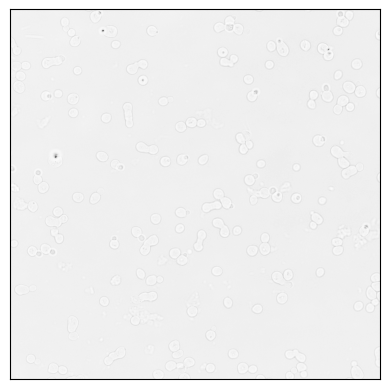

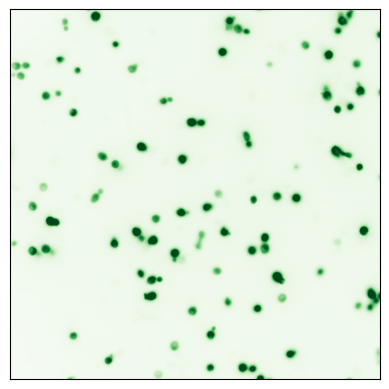

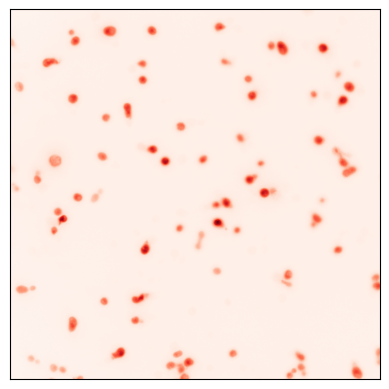

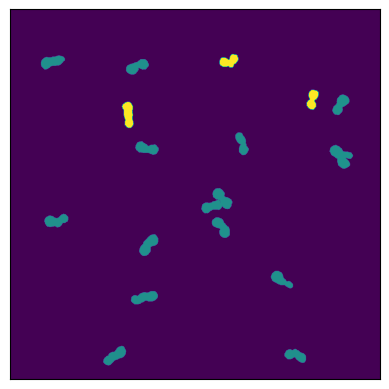

loading img: 0


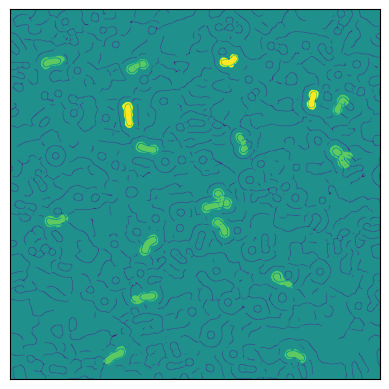

loading img: 1


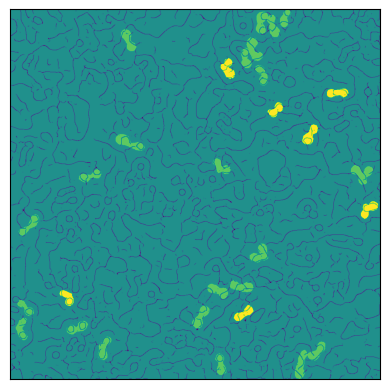

loading img: 2


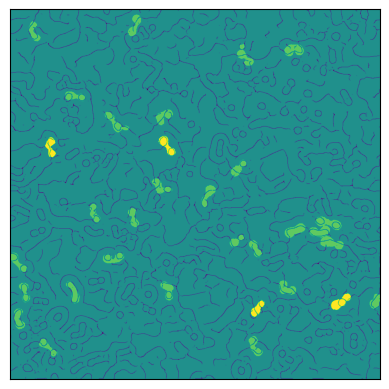

loading img: 3


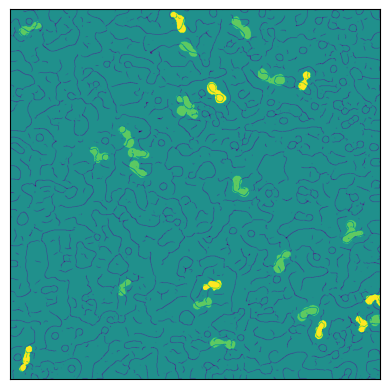

loading img: 4


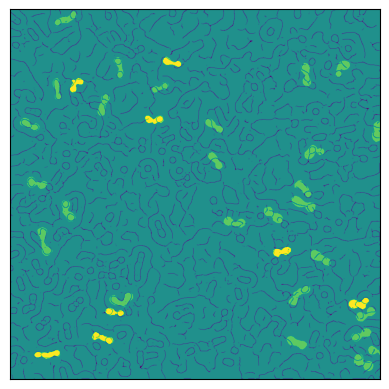

loading img: 5


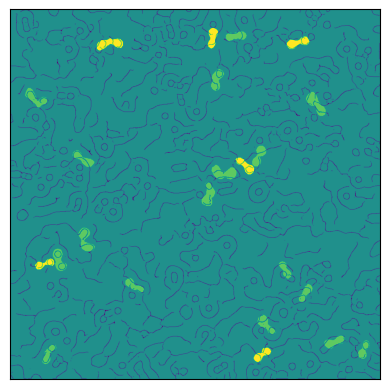

loading img: 6


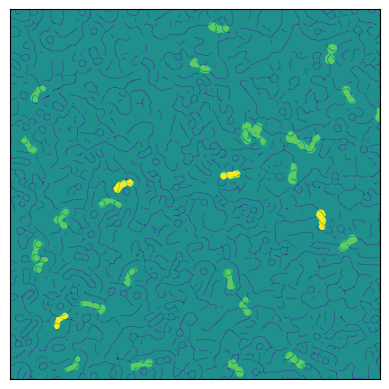

loading img: 7


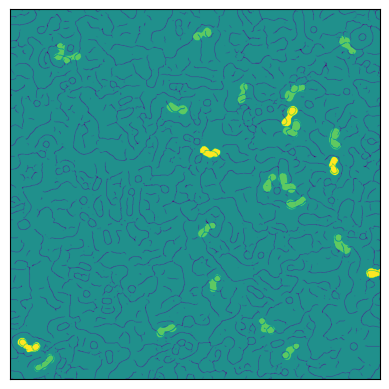

loading img: 8


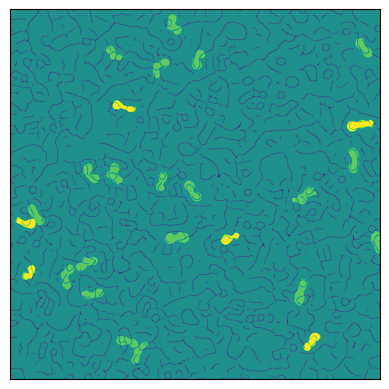

loading img: 9


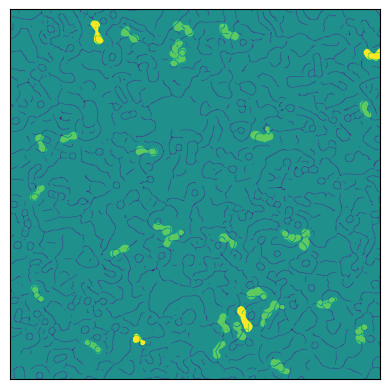

loading img: 10


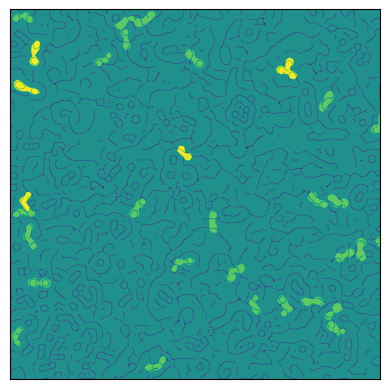

loading img: 11


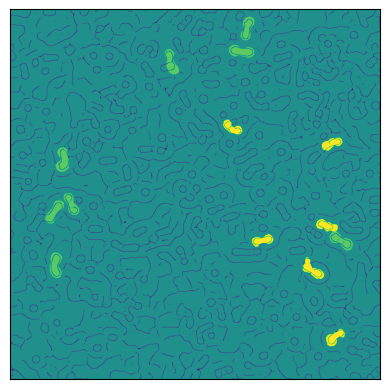

loading img: 12


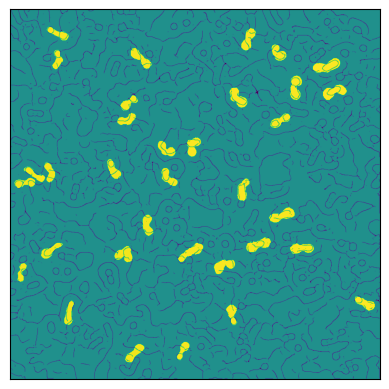

loading img: 13


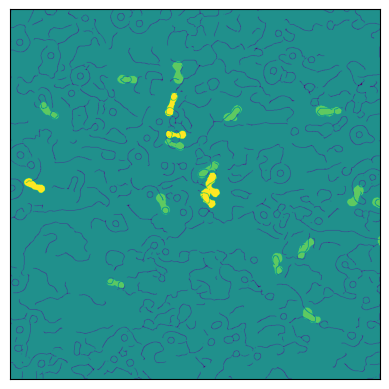

loading img: 14


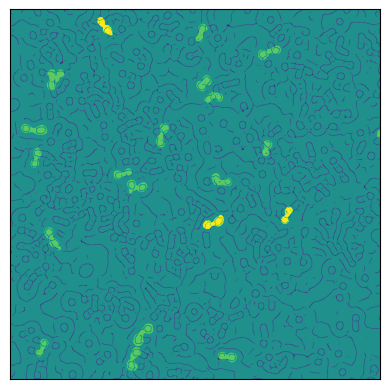

loading img: 15


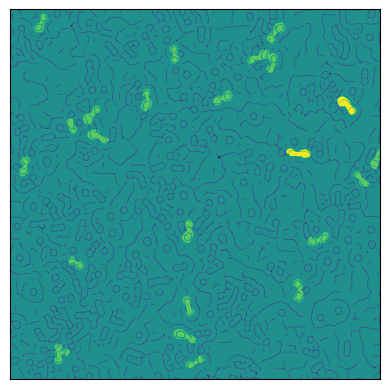

loading img: 16


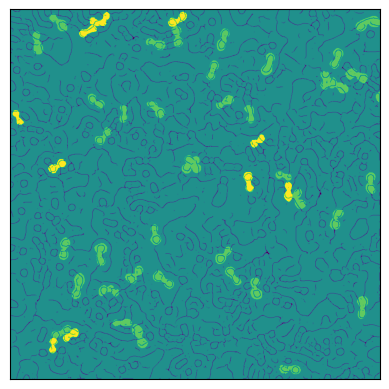

loading img: 17


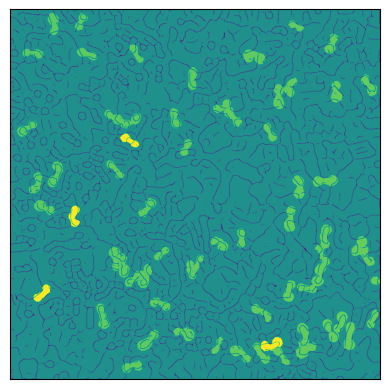

loading img: 18


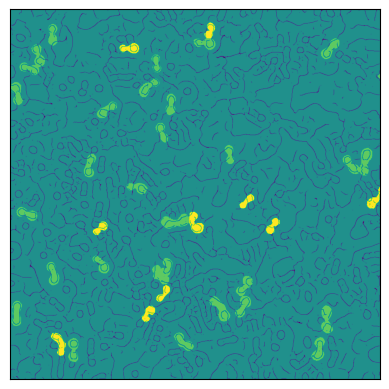

loading img: 19


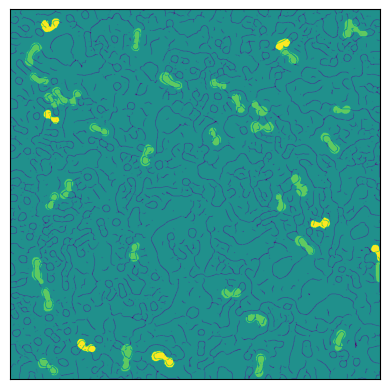

loading img: 20


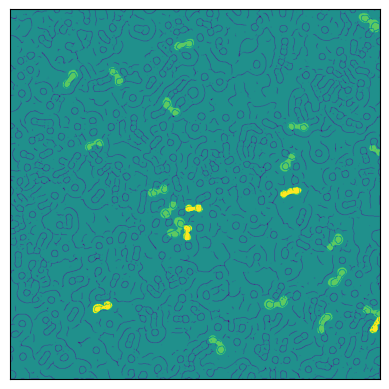

loading img: 21


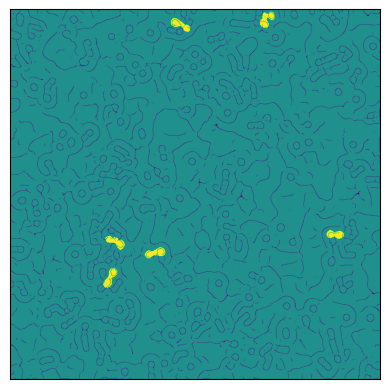

loading img: 22


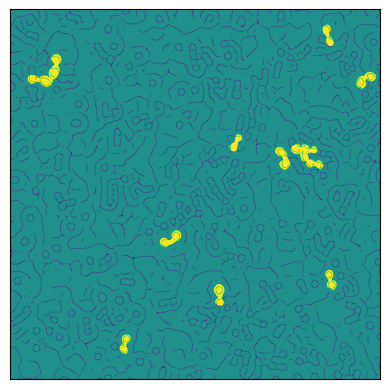

loading img: 23


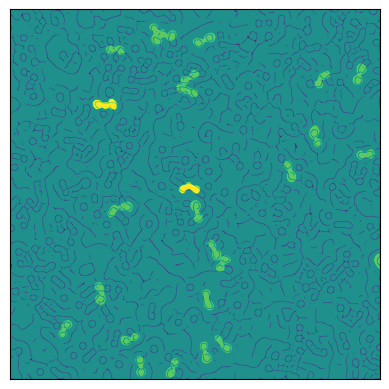

loading img: 24


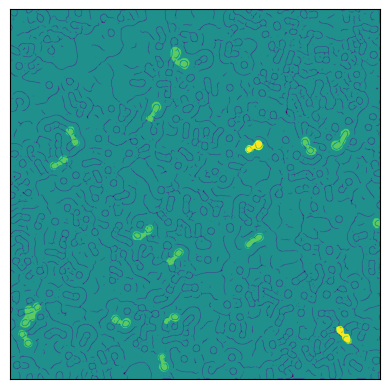

In [25]:
check_example = True
import matplotlib.pyplot as plt
#import edge detection
from skimage import feature
from skimage import measure
%matplotlib inline

if check_example == True:
    print('loading img' )
    img = Image.open(dataset[0]['img'])
    img = [frame for frame in yield_frames(img,verbose=False)]
    print('loading gfp')

    gfp = Image.open(dataset[0]['gfp'])
    gfp = [frame for frame in yield_frames(gfp,verbose=False)]
    
    print('loading rfp')
    rfp = Image.open(dataset[0]['rfp'])
    rfp = [frame for frame in yield_frames(rfp,verbose=False)]

    ax = plt.imshow( img[0] , cmap = 'Greys')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.show()
    
    ax = plt.imshow( gfp[0] , cmap = 'Greens')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.show()
    
    ax = plt.imshow( rfp[0] , cmap = 'Reds')
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.show()
    
    
    ax = plt.imshow( dataset[0]['maskmatrix'] )
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])

    plt.show()


for im in dataset:
    
    print('loading img:' , im )
    img = Image.open(dataset[im]['img'])
    img = [frame for frame in yield_frames(img,verbose=False)]
    #increase contrast
    img = [ (frame - frame.min()) / (frame.max() - frame.min()) * 255 for frame in img]
    #apply edge detection to image w skimiage
    edges = feature.canny(img[0], sigma=10)
    
    #scale the mask to 0-1
    mask = dataset[im]['maskmatrix']
    mask = (mask - mask.min()) / (mask.max() - mask.min()) * 1

    #turn edges from boolean to 0-1
    edges = edges.astype(int)

    #scale edges to 0-1
    edges = (edges - edges.min()) / (edges.max() - edges.min()) * 1
    ax = plt.imshow( mask - edges )
    ax.axes.get_xaxis().set_ticks([])
    ax.axes.get_yaxis().set_ticks([])
    plt.show()
    



In [26]:
from sklearn.preprocessing import RobustScaler
import numpy as np
import pickle



# Initialize the RobustScaler
scaler_bf = RobustScaler()

images_bf = np.stack([ dataset[sample]['stack_mat'][frame] for sample in dataset for frame in dataset[sample]['stack_mat'] ])
print('stacks' , images_bf.shape)

image_stack_bf = images_bf.reshape(-1, images_bf.shape[0])

print( 'fitting scalers ' ) 
scaler_bf.fit(image_stack_bf)

scalers = [scaler_bf]
print('scalers', scalers)
with open('scalers.pkl' , 'wb') as scalerdump:
    scalerdump.write(pickle.dumps(scalers))

stacks (91, 1024, 1024, 3)
fitting scalers 
scalers [RobustScaler()]


In [27]:
#apply data augmentation
#image augmentation for training

import cv2
import random
import numpy as np

def random_rotation(image, masks, angle_range):
    angle = random.uniform(-angle_range, angle_range)
    image =  Image.fromarray(  np.array( np.ones(image.shape)*256 - Image.fromarray(image)).astype(np.uint8) )
    image = image.rotate(angle)
    masks = [ Image.fromarray(m) for m in masks ]
    masks = [ m.rotate(angle) for m in masks ]
    return np.array(image), masks

def random_flip(image, masks):
    if random.random() > 0.5:
        image = cv2.flip(image, 1)
        masks = [ cv2.flip(np.array(m), 1) for m in masks]
    return image, masks

def random_augmentation(image, masks, angle_range, crop_size):
    
    image, masks = random_rotation(image, masks, angle_range)
    
    image, masks = random_flip(image, masks)
   
    
    #image, mask = random_crop(image, mask, crop_size)
    return image, masks

#resize to original size
def resize(image, mask, size):
    image = cv2.resize(image, size)
    mask = cv2.resize(mask, size)
    return image, mask

#apply augmentation and then resize to original size
def augment_and_resize(image, masks, angle_range=180, crop_size=900, size=[1024,1024]):
    image = image.astype(np.uint8)
    image, masks = random_augmentation(image, masks, angle_range, crop_size)
    masks = [np.array(m) for m in masks ]
    #image, masks = resize(image, masks, size)
    return image, masks

In [28]:

augmented_folder = 'augmented/'

In [29]:
import shutil
overwite = True
if overwite:
    try:
        shutil.rmtree(augmented_folder)
    except:
        pass
    os.mkdir(augmented_folder)
    os.mkdir(augmented_folder+'train')
    os.mkdir(augmented_folder+'train/images/')
    os.mkdir(augmented_folder+'train/labels/')
    os.mkdir(augmented_folder +'test')
    os.mkdir(augmented_folder+'test/images/')
    os.mkdir(augmented_folder + 'test/labels/')
    os.mkdir(augmented_folder +'val/')
    os.mkdir(augmented_folder +'val/images')
    os.mkdir(augmented_folder + 'val/labels')


In [30]:
verbose = False
import tqdm 
x_augment = 10
augmented = {}
count = 0
for sample in tqdm.tqdm(dataset):
    augmented[sample] ={}
    for frame in dataset[sample]['stack_mat']:
        image = dataset[sample]['stack_mat'][frame]
        mask = dataset[sample]['maskmatrix']
        masks = split_mask(mask)
        for i in range(x_augment):
            img , masks = augment_and_resize(image,masks)
            
            for m in masks:
                m[m>0] = 1
                
            if count < 10 and verbose == True:
                plt.imshow( img[:,:,0] , cmap = 'Greys')
                plt.colorbar( location = 'left')
                plt.show()
            augmented[sample]['mask'] = mask
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            cv2.imwrite(augmented_folder+'train/images/img_'+str(count)+'.png', im )
            augmented[sample]['img'] = augmented_folder+'train/images/img_'+str(count)+'.png'
            m1,m2,m3 = masks
            lines = output_contours(m1, 0 , verbose = verbose)
            lines += output_contours(m2, 1, verbose = verbose)
            lines += output_contours(m3, 2, verbose = verbose)
            with open(augmented_folder + 'train/labels/img_'+ str(count)+ '.txt', 'w') as f:
                for l in lines:
                    f.write(l)
            augmented[sample]['mask_poly'] = augmented_folder  +'train/labels/img_'+ str(count)+ '.txt'
            #add polygons
            count+=1
            

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 25/25 [02:39<00:00,  6.39s/it]


In [31]:
#move a fraction of the training data and corresponding labels to val
import random
import shutil
import os

datasetdir = 'datasets/'#augmented_folder

files = os.listdir(datasetdir +'train/images/')
print(files[0:100], '...')
random.shuffle(files)
val_files = files[:int(len(files)*.1)]
for f in val_files:
    shutil.move(datasetdir + 'train/images/'+f, datasetdir+'val/images/'+f)
    shutil.move(datasetdir +'train/labels/'+f.replace('.png', '.txt'), datasetdir + 'val/labels/'+f.replace('.png', '.txt'))

    
files = os.listdir(datasetdir+'train/images/')
random.shuffle(files)

test_files = files[:int(len(files)*.1)]
for f in test_files:
    shutil.move(datasetdir + 'train/images/'+f, datasetdir + 'test/images/'+f)
    shutil.move(datasetdir + 'train/labels/'+f.replace('.png', '.txt'), datasetdir + 'test/labels/'+f.replace('.png', '.txt'))



['img_60.png', 'img_51.png', 'img_33.png', 'img_78.png', 'img_9.png', 'img_80.png', 'img_70.png', 'img_85.png', 'img_76.png', 'img_57.png', 'img_48.png', 'img_58.png', 'img_26.png', 'img_30.png', 'img_74.png', 'img_24.png', 'img_53.png', 'img_82.png', 'img_14.png', 'img_87.png', 'img_68.png', 'img_20.png', 'img_35.png', 'img_22.png', 'img_79.png', 'img_19.png', 'img_75.png', 'img_10.png', 'img_36.png', 'img_25.png', 'img_1.png', 'img_73.png', 'img_31.png', 'img_37.png', 'img_39.png', 'img_88.png', 'img_0.png', 'img_40.png', 'img_71.png', 'img_44.png', 'img_17.png', 'img_8.png', 'img_28.png', 'img_90.png', 'img_15.png', 'img_32.png', 'img_13.png', 'img_5.png', 'img_42.png', 'img_83.png', 'img_77.png', 'img_45.png', 'img_89.png', 'img_38.png', 'img_47.png', 'img_27.png', 'img_11.png', 'img_54.png', 'img_16.png', 'img_55.png', 'img_34.png', 'img_67.png', 'img_52.png', 'img_49.png', 'img_29.png', 'img_7.png', 'img_23.png', 'img_12.png', 'img_3.png', 'img_43.png', 'img_2.png', 'img_64.png',

In [20]:
#create traininging yaml file for the dataset
outyaml = """
train: train
val: val
test: test

names: 
    0: f
    1: h
    2: l


# Hyperparameters ------------------------------------------------------------------------------------------------------
# lr0: 0.01  # initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
# lrf: 0.01  # final learning rate (lr0 * lrf)
# momentum: 0.937  # SGD momentum/Adam beta1
# weight_decay: 0.0005  # optimizer weight decay 5e-4
# warmup_epochs: 3.0  # warmup epochs (fractions ok)
# warmup_momentum: 0.8  # warmup initial momentum
# warmup_bias_lr: 0.1  # warmup initial bias lr
# box: 7.5  # box loss gain
# cls: 0.5  # cls loss gain (scale with pixels)
# dfl: 1.5  # dfl loss gain
# pose: 12.0  # pose loss gain
# kobj: 1.0  # keypoint obj loss gain
# label_smoothing: 0.0  # label smoothing (fraction)
# nbs: 64  # nominal batch size
# hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
# hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
# hsv_v: 0.4  # image HSV-Value augmentation (fraction)
# degrees: 0.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.2  # image scale (+/- gain)
shear: 0.2  # image shear (+/- deg) from -0.5 to 0.5
perspective: 0.1  # image perspective (+/- fraction), range 0-0.001
flipud: 0.7  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.3  # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
# copy_paste: 0.0  # segment copy-paste (probability)
"""

with open('./dataset.yaml', 'w') as f:
    f.write(outyaml)

In [21]:
hyp = {}

hyp['lr0']= 0.001 # initial learning rate (i.e. SGD=1E-2, Adam=1E-3)
hyp['lrf']= 0.0001 # final learning rate (lr0 * lrf)
hyp['momentum']= 0.5 # SGD momentum/Adam beta1
hyp['weight_decay']= 0.0001 # optimizer weight decay 5e-4
hyp['warmup_epochs']= 3.0 # warmup epochs (fractions ok)
hyp['warmup_momentum']= 0.8 # warmup initial momentum
hyp['warmup_bias_lr']= 0.01 # warmup initial bias lr
hyp['box']= 10 # box loss gain
hyp['cls']= 5 # cls loss gain (scale with pixels)
hyp['dfl']= .5 # dfl loss gain
hyp['pose']= 0 # pose loss gain
hyp['kobj']= 0 # keypoint obj loss gain
hyp['label_smoothing']= 0.0 # label smoothing (fraction)
hyp['nbs']= 64 # nominal batch size
hyp['hsv_h']= 0.01 # image HSV-Hue augmentation (fraction)
hyp['hsv_s']= 0.01 # image HSV-Saturation augmentation (fraction)
hyp['hsv_v']= 0.01 # image HSV-Value augmentation (fraction)
hyp['degrees']= 180.0 # image rotation (+/- deg)
hyp['translate']= 0.1 # image translation (+/- fraction)
hyp['scale']= 0.1 # image scale (+/- gain)
hyp['shear']= 0.1 # image shear (+/- deg)
hyp['perspective']= 0.0 # image perspective (+/- fraction), range 0-0.001
hyp['flipud']= 0.5 # image flip up-down (probability)
hyp['fliplr']= 0.5 # image flip left-right (probability)
hyp['mosaic']= 0.2 # image mosaic (probability)
hyp['mixup']= 0.0 # image mixup (probability)
hyp['copy_paste']= 0.0 # segment copy-paste (probability)



In [22]:
from ultralytics import YOLO
modelpath = 'yolov8n-seg_yfusion.pt'
import os

overwrite = False
if os.path.exists(modelpath) and overwrite == False:
    model = YOLO(modelpath)
else:
    #train the model
    model = YOLO("yolov8n-seg.pt")

In [23]:
train = False
if train == True:
    results = model.train(
            batch=1,
            device=0,
            data='./dataset.yaml',
            epochs=2000,
            imgsz=1024,
            ** hyp
        )

Ultralytics YOLOv8.2.74 🚀 Python-3.8.19 torch-2.4.0+cu121 CUDA:0 (Quadro RTX 4000, 7959MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg_yfusion.pt, data=./dataset.yaml, epochs=2000, time=None, patience=100, batch=1, imgsz=1024, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train62, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

/home/dmoi/miniconda3/envs/tf_gpu/lib/python3.8/site-packages/ultralytics/engine/trainer.py:269: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning /home/dmoi/projects/yea

train: New cache created: /home/dmoi/projects/yeast_fusion_segmenter/datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /home/dmoi/projects/yeast

val: New cache created: /home/dmoi/projects/yeast_fusion_segmenter/datasets/val/labels.cache


Plotting labels to runs/segment/train62/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.5' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0001), 96 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to runs/segment/train62
Starting training for 2000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/2000      3.33G      1.712      
                 Class     Images  Inst

                   all          9        355     0.0943      0.283      0.115     0.0701      0.743      0.102     0.0978     0.0524



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     2/2000      3.44G      1.598      
                 Class     Images  Inst


                   all          9        355       0.12      0.237      0.157      0.105      0.104       0.21      0.132     0.0654

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/2000      2.91G      2.041      
                 Class     Images  Inst


                   all          9        355     0.0163      0.184     0.0151    0.00803    0.00704     0.0795    0.00437    0.00143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/2000      3.66G      2.222      
                 Class     Images  Inst


                   all          9        355     0.0625      0.149     0.0586     0.0336     0.0348      0.116     0.0268     0.0093

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/2000       2.9G       2.56      
                 Class     Images  Inst

                   all          9        355    0.00111     0.0126   0.000605   0.000143          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/2000      4.23G      2.808      
                 Class     Images  Inst

                   all          9        355    0.00358     0.0404    0.00205   0.000551   0.000123    0.00139   6.23e-05   1.25e-05



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/2000      4.42G       2.42      
                 Class     Images  Inst

                   all          9        355    0.00269     0.0216    0.00142   0.000299          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/2000      4.22G      2.403      
                 Class     Images  Inst

                   all          9        355   0.000491    0.00418    0.00028   9.26e-05          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/2000      3.84G      2.079      
                 Class     Images  Inst

                   all          9        355     0.0279     0.0307     0.0141    0.00788     0.0166     0.0293    0.00977    0.00302



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/2000      3.89G      2.112      
                 Class     Images  Inst

                   all          9        355       0.03     0.0385     0.0133    0.00832     0.0045    0.00697    0.00232   0.000599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/2000      3.97G      2.012      
                 Class     Images  Inst

                   all          9        355    0.00347     0.0209    0.00179    0.00105    0.00275     0.0167    0.00141   0.000721



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/2000      4.21G      2.018      
                 Class     Images  Inst

                   all          9        355      0.135     0.0795     0.0998     0.0433      0.131     0.0628      0.078     0.0264



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/2000      4.39G      1.822      
                 Class     Images  Inst

                   all          9        355      0.129      0.111      0.112     0.0668      0.128      0.109      0.108      0.046



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/2000      2.94G      1.785      
                 Class     Images  Inst

                   all          9        355      0.263        0.2      0.165      0.108      0.246      0.178      0.159     0.0719



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/2000      3.76G      1.744      
                 Class     Images  Inst

                   all          9        355      0.228      0.256      0.201      0.136      0.224      0.253      0.192     0.0942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/2000      3.71G      1.724      
                 Class     Images  Inst

                   all          9        355      0.241      0.291      0.275      0.191      0.249      0.285      0.264      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/2000      2.88G      1.693      
                 Class     Images  Inst

                   all          9        355      0.242      0.276      0.257      0.171      0.224       0.27       0.25      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/2000      3.05G      1.632      
                 Class     Images  Inst

                   all          9        355      0.395      0.168       0.15      0.104      0.413      0.163      0.145     0.0772



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/2000      4.29G      1.549      
                 Class     Images  Inst

                   all          9        355      0.374      0.391       0.33      0.239      0.386      0.405      0.337      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/2000      4.21G      1.522      
                 Class     Images  Inst

                   all          9        355      0.365      0.471      0.385       0.27      0.374      0.476      0.398      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/2000      3.02G      1.477      
                 Class     Images  Inst

                   all          9        355      0.323      0.507      0.382      0.268      0.328      0.504      0.384      0.199



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/2000      2.89G      1.435      
                 Class     Images  Inst

                   all          9        355      0.606      0.517       0.53      0.353      0.569      0.552      0.525       0.29



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/2000       3.7G       1.43      
                 Class     Images  Inst

                   all          9        355      0.551      0.653      0.587      0.374      0.543      0.636      0.572      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/2000       2.8G      1.364      
                 Class     Images  Inst

                   all          9        355       0.57      0.571      0.567      0.368      0.564      0.564      0.557      0.283



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/2000      4.09G       1.38      
                 Class     Images  Inst

                   all          9        355      0.552      0.576       0.57      0.369      0.536      0.588      0.562      0.295



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/2000      4.16G      1.338      
                 Class     Images  Inst

                   all          9        355      0.603       0.54      0.572      0.394      0.617      0.553      0.574      0.328



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/2000      3.73G      1.241      
                 Class     Images  Inst

                   all          9        355      0.656      0.599      0.622      0.434      0.662      0.601       0.62      0.372



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/2000      2.91G      1.235      
                 Class     Images  Inst

                   all          9        355      0.664      0.686      0.675      0.479      0.662      0.683       0.66      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/2000      4.31G      1.171      
                 Class     Images  Inst

                   all          9        355      0.808      0.653       0.71      0.505      0.808      0.653      0.702      0.367



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/2000      3.11G      1.189      
                 Class     Images  Inst

                   all          9        355      0.701      0.658      0.684      0.503      0.744      0.657      0.693       0.38



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/2000      2.87G      1.215      
                 Class     Images  Inst

                   all          9        355      0.684       0.69      0.667      0.489      0.747      0.676      0.695      0.397



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/2000      4.16G      1.263      
                 Class     Images  Inst

                   all          9        355      0.678      0.578      0.581      0.414      0.692      0.581      0.593      0.344



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/2000      4.23G      1.255      
                 Class     Images  Inst

                   all          9        355      0.662      0.569      0.568      0.412      0.666      0.566      0.569      0.347



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/2000      3.89G      1.176      
                 Class     Images  Inst

                   all          9        355      0.768      0.656      0.714      0.503      0.773      0.648       0.71        0.4



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/2000      3.44G       1.24      
                 Class     Images  Inst

                   all          9        355      0.681       0.68      0.677      0.478      0.685      0.686      0.678       0.33



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/2000      3.67G      1.195      
                 Class     Images  Inst

                   all          9        355      0.673      0.669      0.691      0.502      0.698      0.636      0.687      0.354



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/2000      2.81G      1.207      
                 Class     Images  Inst

                   all          9        355      0.713      0.654      0.727      0.542      0.714      0.653      0.718      0.394



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/2000       3.6G      1.152      
                 Class     Images  Inst

                   all          9        355      0.761      0.706      0.756      0.582      0.797      0.672      0.751      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/2000      3.74G      1.105      
                 Class     Images  Inst

                   all          9        355      0.776      0.695      0.758      0.584      0.783      0.694      0.751      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/2000      2.91G      1.104      
                 Class     Images  Inst

                   all          9        355      0.775      0.681      0.742      0.548      0.791      0.679      0.735      0.442



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/2000      3.57G      1.062      
                 Class     Images  Inst

                   all          9        355       0.72      0.628      0.693      0.533      0.759      0.648      0.705      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/2000      3.89G      1.047      
                 Class     Images  Inst

                   all          9        355      0.649      0.696        0.7      0.563      0.656        0.7        0.7      0.434



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/2000      2.87G      1.056      
                 Class     Images  Inst

                   all          9        355      0.721      0.703      0.719      0.584       0.73      0.708      0.723      0.437



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/2000       2.9G      1.048      
                 Class     Images  Inst

                   all          9        355      0.743      0.673      0.714      0.565      0.743      0.673      0.695      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/2000      3.83G      1.011      
                 Class     Images  Inst

                   all          9        355      0.702      0.696      0.701      0.549      0.733      0.639      0.694      0.436



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/2000      2.83G      1.038      
                 Class     Images  Inst

                   all          9        355      0.793      0.719      0.742      0.569      0.784      0.711      0.721      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/2000      2.84G      0.988      
                 Class     Images  Inst

                   all          9        355      0.759      0.764      0.749      0.584      0.782      0.731      0.747      0.463



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    48/2000      2.95G      1.064      
                 Class     Images  Inst

                   all          9        355      0.777      0.723      0.748      0.629      0.782      0.728      0.749      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    49/2000      3.82G      1.045      
                 Class     Images  Inst

                   all          9        355      0.707       0.76      0.732      0.576      0.711      0.758      0.734      0.455



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    50/2000      2.86G      1.014      
                 Class     Images  Inst

                   all          9        355      0.773      0.701      0.742      0.553      0.785      0.684       0.74      0.451



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    51/2000      2.87G      1.057      
                 Class     Images  Inst

                   all          9        355      0.601      0.759      0.726      0.543      0.672      0.666      0.726      0.438



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    52/2000      3.68G      1.026      
                 Class     Images  Inst

                   all          9        355      0.726      0.675      0.719      0.543      0.761      0.665      0.719      0.445



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    53/2000      2.82G     0.9866      
                 Class     Images  Inst

                   all          9        355      0.782      0.696      0.719       0.58      0.785      0.697      0.729      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    54/2000      3.94G     0.9713      
                 Class     Images  Inst

                   all          9        355      0.701      0.719      0.709      0.571      0.703       0.72      0.712      0.449



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    55/2000      2.89G     0.9624      
                 Class     Images  Inst

                   all          9        355      0.696      0.701      0.689      0.539      0.701      0.695      0.696      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    56/2000      3.49G     0.9572      
                 Class     Images  Inst

                   all          9        355      0.637      0.621      0.652      0.507      0.687      0.602      0.657      0.396



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    57/2000      3.41G     0.9488      
                 Class     Images  Inst

                   all          9        355      0.699      0.716      0.742      0.583      0.706      0.724      0.752      0.489



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    58/2000      3.63G     0.9236      
                 Class     Images  Inst

                   all          9        355      0.808      0.702       0.76      0.615      0.803      0.712      0.758      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    59/2000      3.61G      0.936      
                 Class     Images  Inst

                   all          9        355      0.783      0.742       0.75      0.614      0.784      0.732      0.751      0.496



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    60/2000      3.07G     0.9087      
                 Class     Images  Inst

                   all          9        355      0.748      0.688      0.725      0.564      0.751      0.693      0.728      0.456



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    61/2000      2.93G     0.9071      
                 Class     Images  Inst

                   all          9        355      0.728      0.643      0.678      0.542      0.728      0.643      0.678      0.458



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    62/2000      4.22G       0.95      
                 Class     Images  Inst

                   all          9        355        0.7      0.667      0.686      0.503      0.729      0.685      0.705      0.407



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    63/2000      4.34G      1.021      
                 Class     Images  Inst

                   all          9        355      0.726      0.649        0.7      0.502       0.77      0.652      0.718      0.404



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    64/2000      2.87G     0.9769      
                 Class     Images  Inst

                   all          9        355      0.757      0.763      0.754      0.585      0.762      0.768       0.76      0.501



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    65/2000      3.62G     0.9545      
                 Class     Images  Inst

                   all          9        355        0.8      0.749      0.788      0.665      0.805      0.753      0.789      0.568



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    66/2000      2.84G     0.9249      
                 Class     Images  Inst

                   all          9        355      0.746      0.766      0.785      0.652      0.749       0.77      0.789      0.531



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    67/2000      3.63G     0.9174      
                 Class     Images  Inst

                   all          9        355       0.77      0.771       0.79      0.613      0.781      0.781      0.799      0.511



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    68/2000      2.94G     0.9379      
                 Class     Images  Inst

                   all          9        355      0.764      0.692      0.748      0.583      0.778      0.703      0.764      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    69/2000      3.67G     0.9669      
                 Class     Images  Inst

                   all          9        355      0.705      0.739      0.732      0.566      0.719      0.725      0.758      0.485



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    70/2000      2.93G     0.9596      
                 Class     Images  Inst

                   all          9        355      0.728      0.724      0.733      0.572      0.762      0.738       0.75      0.491



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    71/2000      2.95G     0.9644      
                 Class     Images  Inst

                   all          9        355      0.723      0.731      0.744      0.582      0.777      0.713      0.769      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    72/2000      4.12G     0.8989      
                 Class     Images  Inst

                   all          9        355      0.794       0.77      0.786      0.638      0.807      0.781      0.801      0.522



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    73/2000      3.57G     0.9209      
                 Class     Images  Inst

                   all          9        355      0.841      0.763      0.806      0.662      0.848      0.769      0.808      0.535



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    74/2000      2.93G     0.8816      
                 Class     Images  Inst

                   all          9        355      0.836      0.773      0.811      0.652       0.84      0.776      0.816      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    75/2000      2.89G     0.9257      
                 Class     Images  Inst

                   all          9        355      0.814      0.725      0.779      0.609      0.836      0.727      0.789      0.516



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    76/2000       3.6G     0.9391      
                 Class     Images  Inst

                   all          9        355      0.719      0.734      0.762      0.603       0.74      0.743      0.776      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    77/2000       3.9G     0.9696      
                 Class     Images  Inst

                   all          9        355      0.742      0.744      0.761      0.578       0.75      0.743      0.776      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    78/2000      3.06G     0.9544      
                 Class     Images  Inst

                   all          9        355      0.726      0.722      0.721      0.571      0.749      0.716      0.738      0.467



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    79/2000      4.26G     0.9229      
                 Class     Images  Inst

                   all          9        355       0.65      0.793      0.733      0.602      0.669      0.794      0.751      0.486



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    80/2000      3.63G     0.9372      
                 Class     Images  Inst

                   all          9        355      0.789      0.683       0.75      0.607      0.789      0.681      0.749      0.492



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    81/2000      2.98G     0.9246      
                 Class     Images  Inst

                   all          9        355      0.833      0.806       0.83      0.668      0.833      0.806       0.83      0.539



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    82/2000      3.71G     0.9035      
                 Class     Images  Inst

                   all          9        355      0.835      0.834      0.831      0.675      0.835      0.834      0.829      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    83/2000      3.58G     0.9284      
                 Class     Images  Inst

                   all          9        355      0.829      0.801      0.824      0.659      0.829        0.8      0.817       0.56



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    84/2000      4.19G     0.9255      
                 Class     Images  Inst

                   all          9        355      0.805      0.796      0.808      0.648      0.808      0.796      0.802      0.554



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    85/2000      3.81G      0.903      
                 Class     Images  Inst

                   all          9        355      0.845       0.71      0.789      0.617      0.844      0.709      0.782      0.523



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    86/2000      4.42G     0.8994      
                 Class     Images  Inst

                   all          9        355      0.815      0.771      0.808      0.629      0.806      0.763      0.795      0.513



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    87/2000      4.34G     0.8685      
                 Class     Images  Inst

                   all          9        355       0.81      0.769      0.802      0.652      0.809      0.767      0.795      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    88/2000      4.44G     0.8105      
                 Class     Images  Inst

                   all          9        355        0.8      0.778      0.793      0.674      0.799      0.776      0.795      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    89/2000      2.92G     0.8739      
                 Class     Images  Inst

                   all          9        355      0.808      0.761      0.792      0.618      0.814      0.765       0.79      0.497



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    90/2000      4.05G     0.9119      
                 Class     Images  Inst

                   all          9        355      0.833      0.715      0.798      0.599      0.841      0.721      0.801      0.477



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    91/2000      3.95G     0.8197      
                 Class     Images  Inst

                   all          9        355      0.803      0.817       0.82      0.672      0.808      0.822      0.825      0.558



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    92/2000      2.98G     0.9806      
                 Class     Images  Inst

                   all          9        355       0.77      0.747      0.787      0.686      0.779       0.74      0.791      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    93/2000       3.9G      0.927      
                 Class     Images  Inst

                   all          9        355      0.821       0.74      0.785      0.617      0.859      0.752      0.794      0.494



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    94/2000      3.67G     0.8977      
                 Class     Images  Inst

                   all          9        355      0.816      0.789      0.819      0.645      0.816      0.789      0.822      0.542



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    95/2000      4.08G     0.8048      
                 Class     Images  Inst

                   all          9        355      0.851      0.738      0.813      0.685      0.807      0.784      0.813      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    96/2000       3.8G     0.7994      
                 Class     Images  Inst

                   all          9        355      0.815       0.79      0.816        0.7      0.815       0.79      0.816      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    97/2000      2.97G     0.8097      
                 Class     Images  Inst

                   all          9        355      0.823      0.816      0.823      0.671      0.821      0.814      0.829      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    98/2000      3.76G     0.8558      
                 Class     Images  Inst

                   all          9        355      0.837      0.802      0.813      0.646      0.837      0.802      0.816      0.532



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    99/2000      2.86G     0.8281      
                 Class     Images  Inst

                   all          9        355      0.823      0.804      0.821       0.69      0.821      0.801      0.822      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   100/2000      3.87G      0.814      
                 Class     Images  Inst

                   all          9        355       0.79      0.757      0.808      0.678      0.789      0.755      0.807      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   101/2000      4.44G     0.8087      
                 Class     Images  Inst

                   all          9        355      0.794      0.799      0.806      0.683      0.794      0.799      0.805       0.58



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   102/2000      3.53G     0.8049      
                 Class     Images  Inst

                   all          9        355      0.813      0.792      0.816      0.644      0.812       0.79      0.814      0.546



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   103/2000      4.12G     0.7831      
                 Class     Images  Inst

                   all          9        355      0.801      0.756      0.799      0.617      0.799      0.755      0.797      0.512



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   104/2000      3.85G     0.7952      
                 Class     Images  Inst

                   all          9        355      0.781      0.773      0.799      0.649        0.8      0.755      0.805      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   105/2000      2.95G     0.8394      
                 Class     Images  Inst

                   all          9        355      0.794      0.754      0.811      0.674        0.8      0.758      0.818      0.588



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   106/2000      2.88G     0.7935      
                 Class     Images  Inst

                   all          9        355      0.837      0.767      0.826      0.676      0.844      0.772      0.829      0.579



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   107/2000      3.57G     0.7988      
                 Class     Images  Inst

                   all          9        355      0.847      0.741      0.813       0.65      0.856      0.746      0.818      0.544



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   108/2000      3.62G     0.8222      
                 Class     Images  Inst

                   all          9        355      0.812      0.787      0.826      0.664       0.81      0.785      0.824      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   109/2000      3.94G     0.8418      
                 Class     Images  Inst

                   all          9        355      0.807      0.778      0.833      0.681      0.807      0.778      0.832      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   110/2000      4.08G     0.8672      
                 Class     Images  Inst

                   all          9        355      0.842       0.76      0.833      0.685      0.845       0.76      0.833      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   111/2000      4.18G     0.8425      
                 Class     Images  Inst

                   all          9        355      0.834      0.766      0.826      0.684      0.856      0.748      0.826       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   112/2000      4.11G     0.8482      
                 Class     Images  Inst

                   all          9        355      0.889      0.752      0.859      0.664      0.887      0.749      0.856      0.543



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   113/2000       3.7G     0.8293      
                 Class     Images  Inst

                   all          9        355      0.809      0.834      0.855      0.675      0.808      0.833      0.853      0.562



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   114/2000      3.47G     0.7657      
                 Class     Images  Inst

                   all          9        355      0.851      0.762      0.836      0.688      0.851      0.762      0.834      0.578



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   115/2000       2.9G     0.8479      
                 Class     Images  Inst

                   all          9        355      0.836      0.776      0.833      0.709      0.836      0.776      0.833      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   116/2000      3.77G     0.8916      
                 Class     Images  Inst

                   all          9        355      0.794      0.826      0.835      0.703      0.793      0.825      0.835      0.602



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   117/2000      3.64G     0.8475      
                 Class     Images  Inst

                   all          9        355      0.858       0.77      0.832      0.651      0.839       0.79       0.83       0.55



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   118/2000      4.41G     0.8054      
                 Class     Images  Inst

                   all          9        355      0.881      0.758      0.818      0.662      0.889      0.765      0.825      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   119/2000      4.27G     0.8164      
                 Class     Images  Inst

                   all          9        355      0.872      0.767      0.818      0.674      0.868      0.769      0.819      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   120/2000      4.04G     0.8475      
                 Class     Images  Inst

                   all          9        355       0.87      0.793      0.848      0.695      0.867       0.79      0.847      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   121/2000      3.36G     0.8383      
                 Class     Images  Inst

                   all          9        355      0.824       0.81      0.842      0.688      0.822      0.809      0.841      0.593



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   122/2000      2.99G     0.8767      
                 Class     Images  Inst

                   all          9        355      0.872      0.717      0.819      0.646      0.881      0.723      0.829      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   123/2000      3.21G     0.8051      
                 Class     Images  Inst

                   all          9        355      0.797      0.765      0.807      0.632      0.863      0.704      0.805       0.54



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   124/2000         3G      0.825      
                 Class     Images  Inst

                   all          9        355      0.886      0.815      0.877      0.713      0.886      0.815      0.877      0.604



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   125/2000      3.65G     0.8483      
                 Class     Images  Inst

                   all          9        355      0.925      0.814      0.883      0.749      0.925      0.814      0.883      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   126/2000       4.3G     0.8037      
                 Class     Images  Inst

                   all          9        355      0.922      0.803      0.887      0.724       0.92        0.8      0.886      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   127/2000       3.8G     0.8421      
                 Class     Images  Inst

                   all          9        355      0.876      0.819      0.868      0.678       0.88      0.822      0.876      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   128/2000      4.06G      0.862      
                 Class     Images  Inst

                   all          9        355       0.85      0.822      0.866      0.693      0.849      0.821      0.865      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   129/2000      4.39G     0.8976      
                 Class     Images  Inst

                   all          9        355      0.879      0.802      0.865      0.689      0.884      0.806      0.869      0.605



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   130/2000      3.61G     0.8486      
                 Class     Images  Inst

                   all          9        355      0.859      0.735      0.844       0.68      0.869       0.74      0.852      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   131/2000       3.8G     0.8508      
                 Class     Images  Inst

                   all          9        355      0.891      0.795      0.857      0.679      0.889      0.794      0.859      0.572



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   132/2000      4.24G     0.8929      
                 Class     Images  Inst

                   all          9        355      0.825      0.833      0.849      0.675      0.825      0.833       0.85      0.551



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   133/2000      4.27G     0.8204      
                 Class     Images  Inst

                   all          9        355      0.824      0.803      0.842      0.665      0.825      0.805      0.843      0.552



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   134/2000      3.75G     0.8498      
                 Class     Images  Inst

                   all          9        355      0.853      0.802      0.836      0.665      0.854      0.803      0.838      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   135/2000      2.91G     0.8394      
                 Class     Images  Inst

                   all          9        355      0.802      0.836      0.841      0.684        0.8      0.835      0.839      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   136/2000      3.81G     0.7929      
                 Class     Images  Inst

                   all          9        355       0.84      0.858      0.864      0.708       0.84      0.858      0.865      0.596



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   137/2000      3.63G     0.7694      
                 Class     Images  Inst

                   all          9        355        0.9      0.802      0.876      0.715      0.901      0.803      0.876      0.584



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   138/2000      2.84G     0.7781      
                 Class     Images  Inst

                   all          9        355      0.864      0.825      0.874      0.718      0.864      0.825      0.873      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   139/2000      4.44G     0.7852      
                 Class     Images  Inst

                   all          9        355      0.814      0.837      0.859       0.72      0.814      0.837      0.858      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   140/2000      4.05G     0.7942      
                 Class     Images  Inst

                   all          9        355      0.838      0.823      0.852      0.711      0.838      0.823      0.854      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   141/2000      3.71G     0.8287      
                 Class     Images  Inst

                   all          9        355      0.865      0.786      0.819      0.671      0.864      0.784       0.82      0.581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   142/2000       3.6G     0.8227      
                 Class     Images  Inst

                   all          9        355      0.826      0.793      0.818      0.667      0.817      0.816      0.825      0.577



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   143/2000      3.01G     0.7364      
                 Class     Images  Inst

                   all          9        355      0.846      0.837      0.862      0.696      0.851       0.84      0.868      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   144/2000      3.97G     0.7919      
                 Class     Images  Inst

                   all          9        355      0.855      0.842      0.875      0.723      0.853      0.836      0.873      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   145/2000      4.37G     0.7421      
                 Class     Images  Inst

                   all          9        355      0.883      0.811      0.883      0.745      0.884      0.811      0.882      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   146/2000      3.59G     0.7959      
                 Class     Images  Inst

                   all          9        355      0.855      0.841      0.881      0.727      0.855      0.841       0.88       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   147/2000       3.8G     0.7761      
                 Class     Images  Inst

                   all          9        355      0.869      0.846      0.882      0.729      0.869      0.846      0.882      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   148/2000      3.47G     0.7549      
                 Class     Images  Inst

                   all          9        355      0.898        0.8      0.871      0.743      0.898      0.801      0.875      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   149/2000      3.84G     0.7903      
                 Class     Images  Inst

                   all          9        355      0.885      0.784      0.862      0.734      0.869      0.804      0.867      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   150/2000      2.91G     0.7724      
                 Class     Images  Inst

                   all          9        355      0.894      0.786       0.87      0.718      0.893      0.785      0.871      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   151/2000      2.87G     0.7785      
                 Class     Images  Inst

                   all          9        355      0.884       0.81      0.877      0.725      0.883       0.81      0.879      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   152/2000      2.91G      0.755      
                 Class     Images  Inst

                   all          9        355      0.878      0.824      0.878      0.733      0.878      0.824      0.878      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   153/2000       4.4G     0.7529      
                 Class     Images  Inst

                   all          9        355       0.89      0.822      0.883       0.74       0.89      0.822      0.882      0.637



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   154/2000      2.94G     0.7933      
                 Class     Images  Inst

                   all          9        355      0.894      0.842      0.889      0.737      0.894      0.842      0.889      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   155/2000      3.86G     0.7579      
                 Class     Images  Inst

                   all          9        355      0.875      0.848      0.892      0.727      0.875      0.848      0.892      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   156/2000       3.5G     0.7421      
                 Class     Images  Inst

                   all          9        355      0.878       0.82      0.889      0.728      0.873      0.827      0.892       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   157/2000      2.82G     0.7561      
                 Class     Images  Inst

                   all          9        355      0.843      0.788      0.874      0.717      0.849      0.794      0.878      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   158/2000      4.35G     0.7372      
                 Class     Images  Inst

                   all          9        355      0.867      0.761      0.862      0.714      0.873      0.764      0.866      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   159/2000       3.4G     0.7729      
                 Class     Images  Inst

                   all          9        355      0.856      0.813      0.883       0.73       0.86      0.816      0.885      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   160/2000      3.72G     0.7778      
                 Class     Images  Inst

                   all          9        355      0.877      0.812      0.877      0.736      0.883      0.817       0.88       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   161/2000      3.41G     0.7781      
                 Class     Images  Inst

                   all          9        355      0.886      0.808      0.873      0.748      0.893      0.813      0.877      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   162/2000      2.93G     0.7651      
                 Class     Images  Inst

                   all          9        355      0.858      0.844      0.872      0.736      0.865       0.85      0.878      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   163/2000      3.41G     0.8011      
                 Class     Images  Inst

                   all          9        355      0.858      0.829      0.855      0.719      0.847      0.835      0.857      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   164/2000      3.58G     0.7734      
                 Class     Images  Inst

                   all          9        355      0.861      0.852      0.868      0.713      0.862      0.853      0.871      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   165/2000      3.57G     0.7972      
                 Class     Images  Inst

                   all          9        355      0.843      0.826      0.863      0.705      0.837      0.821      0.855      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   166/2000      3.49G     0.7669      
                 Class     Images  Inst

                   all          9        355      0.858      0.804      0.836      0.706      0.857      0.803      0.834      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   167/2000      2.95G     0.8425      
                 Class     Images  Inst

                   all          9        355      0.896      0.751      0.813      0.693      0.896      0.749      0.813      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   168/2000      3.25G      0.828      
                 Class     Images  Inst

                   all          9        355      0.815      0.675      0.735      0.607      0.831      0.687      0.748      0.518



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   169/2000      3.01G     0.7844      
                 Class     Images  Inst

                   all          9        355      0.802      0.675      0.717      0.578      0.802      0.675      0.717      0.495



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   170/2000      3.95G     0.7585      
                 Class     Images  Inst

                   all          9        355      0.848      0.734        0.8      0.673      0.848      0.734      0.798      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   171/2000      2.89G     0.8026      
                 Class     Images  Inst

                   all          9        355      0.795      0.784      0.795      0.649      0.795      0.784      0.792      0.561



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   172/2000      4.35G     0.7627      
                 Class     Images  Inst

                   all          9        355      0.858      0.753      0.814      0.658      0.858      0.753      0.814      0.563



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   173/2000      4.41G     0.7536      
                 Class     Images  Inst

                   all          9        355      0.849      0.844      0.854      0.702      0.849      0.844      0.853       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   174/2000      3.18G     0.8059      
                 Class     Images  Inst

                   all          9        355       0.84      0.842      0.848       0.69       0.84      0.842      0.847      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   175/2000         4G     0.7344      
                 Class     Images  Inst

                   all          9        355      0.881      0.797      0.837      0.673      0.882      0.797      0.837      0.587



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   176/2000      3.71G     0.7559      
                 Class     Images  Inst

                   all          9        355      0.879      0.825      0.879      0.728      0.879      0.825      0.879      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   177/2000      3.01G     0.7519      
                 Class     Images  Inst

                   all          9        355      0.887      0.789      0.862      0.706      0.887      0.789      0.862      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   178/2000      2.92G     0.7618      
                 Class     Images  Inst

                   all          9        355      0.875      0.804      0.872      0.709      0.875      0.804      0.872      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   179/2000      3.56G     0.7396      
                 Class     Images  Inst

                   all          9        355      0.875      0.808      0.863      0.694      0.875      0.808      0.863      0.597



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   180/2000      3.99G     0.7495      
                 Class     Images  Inst

                   all          9        355      0.852      0.798      0.857      0.682      0.852      0.798      0.857      0.599



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   181/2000      3.63G     0.7985      
                 Class     Images  Inst

                   all          9        355      0.838      0.805      0.851      0.708      0.838      0.805      0.851      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   182/2000      3.99G     0.7701      
                 Class     Images  Inst

                   all          9        355      0.853      0.842      0.878      0.719      0.853      0.842      0.878       0.62



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   183/2000      2.95G     0.7917      
                 Class     Images  Inst

                   all          9        355      0.897      0.791      0.862      0.718      0.897      0.791      0.862      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   184/2000      4.41G     0.7849      
                 Class     Images  Inst

                   all          9        355      0.857      0.787      0.854      0.713      0.854      0.784      0.853      0.614



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   185/2000      3.67G      0.821      
                 Class     Images  Inst

                   all          9        355      0.818      0.842      0.861      0.713       0.86       0.81      0.867      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   186/2000      2.96G     0.8251      
                 Class     Images  Inst

                   all          9        355      0.864      0.788      0.863      0.703      0.872      0.794      0.871        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   187/2000      3.72G      0.805      
                 Class     Images  Inst

                   all          9        355      0.899      0.793       0.88      0.721      0.908        0.8      0.891      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   188/2000      4.33G     0.7771      
                 Class     Images  Inst

                   all          9        355        0.9      0.834      0.887      0.733      0.907       0.84      0.896      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   189/2000      3.05G     0.7468      
                 Class     Images  Inst

                   all          9        355       0.92      0.858      0.885      0.751      0.927      0.864      0.895      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   190/2000      2.89G     0.7514      
                 Class     Images  Inst

                   all          9        355      0.901      0.866      0.877      0.738      0.908      0.872      0.888       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   191/2000      4.08G     0.7629      
                 Class     Images  Inst

                   all          9        355      0.902      0.828      0.873      0.715      0.909      0.835      0.884      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   192/2000      2.91G     0.7424      
                 Class     Images  Inst

                   all          9        355      0.879      0.838      0.872      0.729      0.886      0.844      0.885      0.615



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   193/2000      3.45G     0.7527      
                 Class     Images  Inst

                   all          9        355      0.836      0.841      0.854      0.709      0.844      0.847      0.866       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   194/2000      2.94G     0.7338      
                 Class     Images  Inst

                   all          9        355      0.856      0.849      0.861      0.724      0.856      0.849      0.861      0.606



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   195/2000      4.11G     0.7434      
                 Class     Images  Inst

                   all          9        355      0.901      0.851      0.892      0.724      0.901      0.851       0.89      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   196/2000      3.02G     0.7756      
                 Class     Images  Inst

                   all          9        355      0.896      0.866      0.884      0.705      0.896      0.866      0.883        0.6



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   197/2000      2.87G     0.7856      
                 Class     Images  Inst

                   all          9        355      0.903      0.848      0.876      0.747      0.903      0.848      0.876      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   198/2000      2.78G      0.795      
                 Class     Images  Inst

                   all          9        355      0.875       0.81      0.875       0.73      0.874       0.81      0.875      0.623



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   199/2000      4.32G     0.7748      
                 Class     Images  Inst

                   all          9        355      0.867      0.823      0.877      0.707      0.867      0.823      0.877      0.582



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   200/2000      2.99G     0.7847      
                 Class     Images  Inst

                   all          9        355      0.878      0.787      0.868      0.681      0.878      0.787      0.867      0.569



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   201/2000      3.09G     0.8137      
                 Class     Images  Inst

                   all          9        355      0.853      0.822      0.879      0.751      0.852      0.821      0.878      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   202/2000      3.89G     0.8002      
                 Class     Images  Inst

                   all          9        355      0.882      0.834      0.878      0.721      0.889      0.841      0.889      0.639



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   203/2000      3.06G     0.7969      
                 Class     Images  Inst

                   all          9        355      0.915      0.838      0.886      0.689      0.922      0.845      0.895      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   204/2000      4.16G     0.7943      
                 Class     Images  Inst

                   all          9        355      0.904      0.871      0.893      0.726      0.904      0.871      0.892      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   205/2000      3.93G     0.7562      
                 Class     Images  Inst

                   all          9        355      0.893      0.858      0.881      0.752      0.893      0.858      0.882       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   206/2000      2.88G     0.7718      
                 Class     Images  Inst

                   all          9        355      0.869      0.849      0.864      0.728      0.869      0.849      0.864      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   207/2000      3.07G     0.7635      
                 Class     Images  Inst

                   all          9        355      0.872       0.85      0.866      0.717      0.879      0.856      0.873      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   208/2000      4.16G     0.7829      
                 Class     Images  Inst

                   all          9        355      0.856      0.819      0.851      0.669      0.863      0.824      0.858      0.564



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   209/2000       3.6G     0.7363      
                 Class     Images  Inst

                   all          9        355       0.86      0.814      0.862      0.678      0.869       0.82      0.868      0.589



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   210/2000      3.32G     0.7757      
                 Class     Images  Inst

                   all          9        355       0.85      0.805      0.862       0.71      0.859      0.811      0.867      0.618



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   211/2000      2.81G     0.7824      
                 Class     Images  Inst

                   all          9        355      0.871      0.769      0.868       0.73      0.888       0.78      0.884       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   212/2000      2.88G     0.7657      
                 Class     Images  Inst

                   all          9        355      0.856      0.773      0.869      0.709      0.875      0.786      0.886      0.598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   213/2000      4.44G     0.7617      
                 Class     Images  Inst

                   all          9        355      0.819      0.832      0.882      0.702      0.837      0.846      0.901      0.591



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   214/2000      4.31G     0.7196      
                 Class     Images  Inst

                   all          9        355       0.89      0.833      0.881       0.73       0.89      0.833      0.881      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   215/2000      2.94G     0.7636      
                 Class     Images  Inst

                   all          9        355      0.867      0.824      0.844      0.714      0.867      0.824      0.843      0.641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   216/2000      3.01G     0.7503      
                 Class     Images  Inst

                   all          9        355      0.908      0.806      0.889      0.734       0.91      0.804      0.888      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   217/2000      2.92G      0.722      
                 Class     Images  Inst

                   all          9        355      0.845      0.829      0.884      0.709      0.845      0.829      0.883      0.601



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   218/2000      2.85G     0.7436      
                 Class     Images  Inst

                   all          9        355      0.869      0.832      0.886      0.724      0.877      0.839      0.896      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   219/2000      4.09G     0.7362      
                 Class     Images  Inst

                   all          9        355       0.87      0.834      0.886      0.736       0.88      0.841      0.895      0.627



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   220/2000      3.83G     0.7254      
                 Class     Images  Inst

                   all          9        355        0.9      0.759      0.871      0.727      0.911      0.766      0.876      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   221/2000      2.92G     0.7361      
                 Class     Images  Inst

                   all          9        355      0.845      0.828      0.883      0.713      0.845      0.828      0.884      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   222/2000      3.48G     0.7445      
                 Class     Images  Inst

                   all          9        355      0.838      0.856      0.888      0.698      0.848      0.834      0.887       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   223/2000      3.47G      0.764      
                 Class     Images  Inst

                   all          9        355      0.846      0.864      0.881      0.699      0.847      0.865      0.883      0.585



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   224/2000      4.43G     0.7225      
                 Class     Images  Inst

                   all          9        355      0.861      0.824      0.853      0.701      0.862      0.825      0.851      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   225/2000      3.86G     0.7316      
                 Class     Images  Inst

                   all          9        355      0.853      0.797      0.832      0.705      0.853      0.797       0.83      0.617



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   226/2000      3.96G     0.7685      
                 Class     Images  Inst

                   all          9        355      0.826      0.791      0.823      0.701      0.826      0.791      0.822      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   227/2000      4.42G     0.7184      
                 Class     Images  Inst

                   all          9        355      0.878      0.873      0.881      0.708      0.878      0.873      0.881      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   228/2000      3.78G     0.7604      
                 Class     Images  Inst

                   all          9        355      0.925      0.839       0.88      0.699      0.925      0.839      0.881      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   229/2000      2.96G     0.6931      
                 Class     Images  Inst

                   all          9        355      0.928      0.861      0.899       0.73      0.928      0.861      0.899      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   230/2000       2.9G     0.7116      
                 Class     Images  Inst

                   all          9        355      0.919      0.872      0.899      0.766      0.919      0.872      0.899      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   231/2000      4.27G     0.7525      
                 Class     Images  Inst

                   all          9        355      0.906      0.864      0.897      0.764      0.906      0.864      0.897      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   232/2000      3.07G     0.7419      
                 Class     Images  Inst

                   all          9        355      0.933      0.841      0.902      0.749      0.933      0.841      0.902      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   233/2000      3.64G     0.7302      
                 Class     Images  Inst

                   all          9        355      0.894       0.83      0.881      0.688      0.909      0.842      0.901       0.59



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   234/2000      4.42G      0.738      
                 Class     Images  Inst

                   all          9        355      0.895      0.822      0.879      0.712      0.903      0.829      0.888      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   235/2000      2.99G     0.7651      
                 Class     Images  Inst

                   all          9        355      0.923      0.829      0.895      0.759      0.923      0.829      0.897      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   236/2000      2.89G     0.7668      
                 Class     Images  Inst

                   all          9        355      0.892      0.869      0.896      0.745      0.892      0.868      0.893      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   237/2000      2.97G     0.7663      
                 Class     Images  Inst

                   all          9        355      0.927      0.869      0.905      0.706      0.927      0.869      0.905      0.609



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   238/2000       4.2G     0.7739      
                 Class     Images  Inst

                   all          9        355      0.876      0.874      0.898      0.708      0.881      0.879        0.9      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   239/2000      3.95G     0.7711      
                 Class     Images  Inst

                   all          9        355      0.857      0.866      0.895      0.738      0.862      0.871      0.898      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   240/2000      3.07G     0.7484      
                 Class     Images  Inst

                   all          9        355      0.914      0.812      0.891      0.737      0.919      0.816      0.893      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   241/2000      3.69G     0.7325      
                 Class     Images  Inst

                   all          9        355      0.887      0.833      0.893      0.711      0.892      0.837      0.893      0.611



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   242/2000      3.66G     0.7386      
                 Class     Images  Inst

                   all          9        355      0.923      0.854      0.905       0.73      0.922      0.852      0.905      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   243/2000      2.95G     0.7388      
                 Class     Images  Inst

                   all          9        355      0.884      0.862      0.901      0.734      0.884      0.862        0.9       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   244/2000      4.42G     0.7267      
                 Class     Images  Inst

                   all          9        355      0.889      0.863      0.903      0.742       0.89      0.862      0.902      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   245/2000      3.79G     0.7256      
                 Class     Images  Inst

                   all          9        355      0.892      0.875       0.91      0.757      0.892      0.875      0.908      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   246/2000      4.37G     0.7378      
                 Class     Images  Inst

                   all          9        355      0.875      0.839      0.886      0.742      0.874      0.837      0.885       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   247/2000      3.96G     0.7229      
                 Class     Images  Inst

                   all          9        355      0.848      0.841      0.882      0.747      0.846       0.84      0.881      0.646



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   248/2000       3.6G     0.7222      
                 Class     Images  Inst

                   all          9        355      0.845      0.824      0.859      0.701      0.844      0.822      0.858      0.594



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   249/2000      3.62G     0.7143      
                 Class     Images  Inst

                   all          9        355      0.891      0.842      0.874      0.712      0.891      0.842      0.874      0.608



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   250/2000      2.93G     0.7146      
                 Class     Images  Inst

                   all          9        355      0.823      0.829      0.849      0.712      0.823      0.829      0.848       0.61



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   251/2000       3.2G     0.7479      
                 Class     Images  Inst

                   all          9        355      0.857       0.84      0.879       0.73      0.856      0.838      0.878      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   252/2000      4.15G     0.7468      
                 Class     Images  Inst

                   all          9        355      0.837      0.754      0.849      0.698      0.837      0.754      0.849      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   253/2000      4.28G     0.7506      
                 Class     Images  Inst

                   all          9        355      0.848      0.766      0.852      0.693      0.848      0.766      0.853      0.595



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   254/2000      2.96G     0.7444      
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.85       0.77      0.848      0.691       0.85       0.77       0.85      0.592



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   255/2000         3G     0.7308      1.123       3.61     0.2893         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.849      0.846      0.886      0.738      0.849      0.846      0.886      0.647



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   256/2000      3.65G     0.7403      1.118      3.509     0.2909         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.833      0.823      0.881      0.748      0.833      0.823      0.881      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   257/2000      3.47G     0.7355      1.119      3.463     0.2915         41       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.86       0.83      0.886      0.753       0.86       0.83      0.885      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   258/2000      2.89G      0.722      1.113      3.372     0.2872         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.867      0.865      0.905      0.751       0.88      0.859      0.905      0.642



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   259/2000      4.29G     0.7279      1.094      3.231     0.2909         37       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.863      0.859      0.906      0.755      0.863      0.859      0.906      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   260/2000      4.13G     0.7105      1.089        3.3     0.2903         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.878      0.841      0.899       0.76      0.877      0.839      0.898      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   261/2000       2.9G     0.7034      1.086      3.387     0.2893         52       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.841      0.822      0.876      0.726      0.846      0.826      0.876      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   262/2000      3.17G     0.7447      1.137      3.408     0.2931         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.845       0.82      0.881      0.708      0.851      0.826      0.883      0.607



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   263/2000      3.65G      0.708       1.08      3.381     0.2893         32       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.89      0.835      0.891      0.747      0.901      0.837      0.892      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   264/2000       4.3G     0.7294      1.112      3.584     0.2919         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.922      0.835      0.897      0.762      0.922      0.835      0.897      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   265/2000      3.64G     0.7417      1.131      3.367     0.2911         16       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.937      0.825      0.895      0.741      0.937      0.825      0.895      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   266/2000      4.15G     0.7579      1.137       3.58     0.2951         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.907      0.812      0.893      0.741      0.908      0.811      0.893      0.625



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   267/2000       4.2G     0.7257      1.096      3.364     0.2876         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.89      0.795      0.868      0.727       0.89      0.795       0.87       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   268/2000      2.92G      0.741      1.086      3.377     0.2921         52       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.882      0.763      0.853       0.71      0.882      0.763      0.855      0.633



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   269/2000       3.9G     0.7287      1.071      3.465     0.2923         52       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.863      0.834      0.885      0.731      0.863      0.834      0.885      0.644



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   270/2000      2.93G     0.7008      1.063      3.354     0.2884         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.912      0.818      0.889      0.729      0.912      0.818      0.889      0.638



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   271/2000      4.09G     0.7335      1.091      3.499     0.2919         11       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.912      0.791      0.877      0.717      0.912      0.791      0.877      0.621



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   272/2000      2.97G     0.7113      1.081      3.299     0.2879         62       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.86      0.821      0.865      0.728       0.86      0.821      0.865      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   273/2000      2.91G     0.7085       1.08      3.293     0.2898         18       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.846      0.805      0.872      0.723      0.846      0.805      0.872      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   274/2000      2.93G     0.7276      1.071      3.251     0.2901         38       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.86      0.793      0.865      0.714      0.868      0.799      0.875      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   275/2000      3.86G     0.7123      1.102      3.255     0.2892         20       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.85      0.838      0.891      0.738       0.85      0.838      0.891       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   276/2000      4.06G     0.7228      1.115      3.179     0.2887         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906      0.839       0.91       0.77      0.906      0.839       0.91      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   277/2000      2.82G     0.7185      1.078      3.103     0.2873         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.92      0.867      0.918      0.767      0.926       0.86      0.918      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   278/2000       2.9G     0.7479      1.112      3.685     0.2897         75       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.858      0.869      0.905      0.742      0.857      0.867      0.904      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   279/2000      2.93G     0.7266      1.078      3.378     0.2904         77       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.894      0.846      0.906      0.762      0.894      0.845      0.906      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   280/2000      2.89G      0.706      1.091      3.379     0.2883         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.872      0.852      0.895       0.74      0.872      0.852      0.895      0.631



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   281/2000      3.64G     0.6948      1.085      3.343     0.2866         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.903      0.804      0.875       0.73      0.903      0.804      0.872      0.622



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   282/2000      2.94G     0.7234       1.07       3.36     0.2896         38       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.836      0.886      0.758      0.924      0.836      0.885      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   283/2000      2.96G     0.7672      1.118      3.501     0.2924         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.932      0.822      0.877      0.749      0.932      0.822      0.872      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   284/2000      4.42G      0.737      1.097      3.508     0.2918         36       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.892      0.853      0.882      0.717      0.903      0.843      0.878      0.616



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   285/2000      3.67G     0.7327      1.115       3.22     0.2905         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.836      0.866      0.883      0.726      0.832      0.861      0.879      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   286/2000      2.96G     0.7404      1.125       3.43      0.292         53       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.82       0.86      0.883      0.733       0.82       0.86      0.884      0.634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   287/2000      2.89G     0.7713      1.154      3.699     0.2954         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.85      0.811      0.872       0.73      0.844      0.804      0.868       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   288/2000         3G     0.7427      1.111      3.709     0.2931         43       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.873      0.847      0.876      0.746      0.872      0.846      0.877      0.659



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   289/2000       3.6G     0.7557       1.16      3.377     0.2905         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.899      0.839      0.892      0.742      0.901       0.84      0.893      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   290/2000      2.86G     0.7216      1.091      3.314     0.2897         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.94      0.831      0.899       0.74       0.94      0.831      0.899       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   291/2000      4.34G     0.7111      1.087      3.343     0.2895         20       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.908      0.852      0.885      0.746      0.915      0.858      0.891      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   292/2000      3.56G     0.7114      1.084      3.323     0.2884         66       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.892      0.851      0.886      0.746      0.899      0.857      0.895      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   293/2000      3.73G      0.727      1.097      3.343     0.2868         45       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.913      0.835      0.888       0.76      0.928      0.847      0.903      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   294/2000      2.87G     0.7235      1.118      3.289     0.2888         56       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.917      0.823      0.892      0.738      0.917      0.823      0.892      0.635



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   295/2000      3.69G     0.6991      1.067      3.301     0.2875         42       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.905      0.836      0.881      0.719      0.921      0.849      0.898      0.624



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   296/2000      3.18G     0.7402      1.166      3.477     0.2892         43       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906       0.83      0.894       0.73      0.906       0.83      0.894      0.632



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   297/2000      2.93G     0.7134      1.113      3.228     0.2875         50       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.914       0.88      0.919      0.779      0.914       0.88      0.919      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   298/2000      2.89G     0.7733      1.143      3.593      0.293         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.934       0.87      0.914      0.761      0.941      0.876      0.917      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   299/2000      3.67G     0.6915      1.074      3.171     0.2892         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.95      0.887      0.919      0.759       0.95      0.887      0.919      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   300/2000      3.72G      0.684      1.048      3.197     0.2869         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.93      0.895      0.919      0.778       0.93      0.895      0.919      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   301/2000      3.98G     0.7189      1.079      3.357     0.2906          6       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.937      0.882       0.92      0.798      0.937      0.882       0.92      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   302/2000      3.77G     0.7274      1.122      3.247     0.2887         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.942      0.869      0.905      0.753      0.949      0.875      0.919      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   303/2000      2.82G     0.6997      1.058      3.175      0.286         30       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.919      0.873      0.906      0.735      0.927      0.879      0.918      0.626



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   304/2000      4.29G     0.7177      1.077      3.324     0.2891         68       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.947      0.845      0.908      0.778      0.947      0.845      0.909       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   305/2000      3.74G      0.716      1.077      3.368     0.2877         13       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.847      0.905      0.796      0.924      0.847      0.905      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   306/2000      2.99G     0.7105      1.085       3.37     0.2888         45       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.92      0.895      0.918      0.798       0.92      0.895      0.918      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   307/2000      2.91G     0.7042      1.055      3.246     0.2891         74       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.927      0.902      0.916      0.773      0.927      0.902      0.916      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   308/2000       3.5G      0.722      1.083      3.152     0.2879         71       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.908      0.881      0.909      0.775      0.908      0.881      0.909      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   309/2000      4.22G     0.7084      1.065       3.24     0.2866         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.915      0.863      0.909      0.785      0.915      0.863      0.909      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   310/2000      3.57G     0.6877      1.032      3.174     0.2894          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.925      0.872      0.907      0.769      0.928      0.872      0.909      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   311/2000      2.91G     0.6774      1.036      3.278     0.2865         35       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.899      0.859      0.899       0.75      0.914      0.859      0.902      0.653



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   312/2000      4.26G     0.7285      1.078      3.377     0.2906         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.921      0.877      0.915      0.765      0.921      0.877      0.915      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   313/2000      3.52G     0.7275      1.104      3.468     0.2899         19       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.895      0.883      0.913      0.771      0.895      0.883      0.913      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   314/2000      4.19G     0.6865      1.072      3.525     0.2851         46       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.898      0.867      0.907      0.765      0.898      0.867      0.907      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   315/2000      2.98G     0.7116      1.095      3.474     0.2865         53       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.897      0.878      0.908      0.754      0.897      0.878      0.908      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   316/2000      3.48G     0.6946      1.052      3.357     0.2858         13       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906      0.856      0.913      0.765      0.906      0.856      0.913      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   317/2000      3.96G     0.6925      1.056      3.304     0.2851          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.92      0.878      0.919      0.771       0.92      0.878      0.919      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   318/2000      2.96G     0.6883      1.051      3.368     0.2872         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.861      0.914      0.773      0.924      0.861      0.914      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   319/2000       3.5G     0.7072      1.085      3.486     0.2873         44       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.874      0.911      0.767      0.924      0.874      0.911       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   320/2000      3.79G     0.6945      1.076      3.414     0.2866         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.951       0.86      0.914       0.76      0.951       0.86      0.914      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   321/2000      3.67G     0.7156      1.122      3.556     0.2902         41       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.964      0.859      0.916       0.76      0.964      0.859      0.916      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   322/2000      3.94G     0.7164      1.094      3.364     0.2894         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.959       0.86      0.921      0.778      0.959       0.86      0.921       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   323/2000      2.98G     0.6742      1.044       3.27     0.2841         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.875      0.917      0.806      0.924      0.875      0.917      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   324/2000      3.85G     0.7045       1.07      3.217      0.288         49       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.895      0.879      0.917      0.796      0.895      0.879      0.917      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   325/2000      3.99G     0.6851      1.043      3.229     0.2863         18       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.926      0.858      0.912      0.772      0.926      0.858      0.912      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   326/2000      3.66G     0.7283      1.107       3.28     0.2881         32       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.939      0.853      0.909      0.755      0.939      0.853      0.909       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   327/2000      4.32G     0.6937       1.07      3.019     0.2859         28       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.932      0.852       0.91      0.778      0.932      0.852       0.91      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   328/2000       2.9G     0.6899      1.078      3.063     0.2849         40       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.923      0.848      0.896      0.791      0.931      0.854      0.903      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   329/2000      3.13G     0.7056       1.07       3.17     0.2862         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.937      0.842      0.916      0.772      0.937      0.842      0.916      0.669



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   330/2000      4.15G     0.6792      1.057      3.138     0.2853         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.956      0.849      0.916      0.748      0.956      0.849      0.916       0.63



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   331/2000      3.88G     0.7171      1.088      3.028     0.2862         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.956      0.852      0.918      0.775      0.956      0.852      0.918      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   332/2000      4.37G     0.6996      1.046      2.999     0.2875         59       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.961      0.862      0.911       0.79      0.961      0.862      0.911      0.706



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   333/2000      2.96G     0.6918      1.047      3.007      0.286         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.968      0.867      0.911      0.774      0.968      0.867      0.911      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   334/2000      4.26G      0.689      1.059      2.973     0.2871         47       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.973      0.863      0.916      0.758      0.973      0.863      0.916      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   335/2000      4.19G     0.6814      1.063      2.991     0.2877          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.933      0.872      0.927      0.787      0.933      0.872      0.927      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   336/2000      2.88G      0.689      1.024      3.031     0.2877         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.908      0.867      0.917      0.766       0.91      0.868      0.917      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   337/2000      4.27G     0.7055      1.046      3.116     0.2869         68       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.941      0.893      0.923      0.779      0.941      0.893      0.923      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   338/2000      3.16G     0.7044      1.083      3.053     0.2863         51       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.93      0.896      0.918      0.759       0.93      0.896      0.918      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   339/2000      2.96G     0.7231      1.065       3.34     0.2883         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.948      0.895      0.914      0.744      0.948      0.895      0.914      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   340/2000      4.33G     0.6783      1.018      3.124     0.2843         30       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.966       0.89      0.917      0.779      0.966       0.89      0.918      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   341/2000      2.92G     0.7187      1.099      3.246     0.2867         44       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.952      0.882      0.921        0.8      0.952      0.882      0.921      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   342/2000      4.42G     0.7085      1.072      3.285     0.2863         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.939      0.837      0.918      0.765      0.939      0.837      0.918      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   343/2000      4.07G     0.7185      1.067      3.277     0.2872         32       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.946       0.84      0.916      0.748      0.946       0.84      0.916      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   344/2000      3.84G     0.6943      1.074      3.168     0.2866         73       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.929      0.852      0.913      0.769      0.929      0.852      0.913      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   345/2000      4.39G     0.6897      1.045      3.123     0.2864         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.942      0.871      0.916      0.795      0.942      0.871      0.916      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   346/2000      3.01G     0.7207      1.084      3.183     0.2886         50       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.921      0.857      0.909      0.794      0.921      0.857      0.909      0.695



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   347/2000      4.01G     0.6964      1.064      3.145     0.2852         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.905      0.859        0.9      0.783      0.905      0.859        0.9       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   348/2000      3.69G     0.6947      1.052      3.096     0.2856         37       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.953       0.85      0.901       0.74      0.953       0.85      0.898      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   349/2000      2.76G      0.685       1.06      3.288     0.2857         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.902      0.852      0.901      0.754      0.902      0.852        0.9       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   350/2000      2.87G      0.696       1.04      3.197     0.2877         35       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.89      0.878      0.902      0.778       0.89      0.878      0.902      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   351/2000      2.98G     0.7056      1.075      3.189     0.2878         11       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.936      0.858      0.906      0.774      0.936      0.858      0.906       0.67



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   352/2000      3.68G     0.7254      1.108      3.373      0.287         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.927      0.862      0.909      0.758      0.927      0.862      0.909      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   353/2000       2.9G     0.7146      1.095      3.273     0.2886          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.964      0.861      0.912      0.757      0.964      0.861      0.912      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   354/2000      4.03G     0.7077      1.083      3.224     0.2868          9       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.954      0.861      0.916      0.769      0.954      0.861      0.916      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   355/2000      2.94G     0.7349      1.089      3.241     0.2873         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.911      0.882      0.916      0.777      0.911      0.882      0.916      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   356/2000      3.72G     0.6945       1.08      3.033     0.2832         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906      0.863      0.916      0.783      0.906      0.863      0.916      0.665



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   357/2000         4G     0.6977      1.075      3.124     0.2858         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.888      0.893      0.914        0.8      0.888      0.893      0.914      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   358/2000      2.75G     0.6834      1.034      3.112     0.2861         26       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.887      0.885      0.917      0.788      0.887      0.885      0.917      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   359/2000      4.37G     0.6872      1.053      3.058     0.2866         28       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.905      0.864       0.92      0.773      0.905      0.864       0.92      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   360/2000      2.89G     0.6934      1.074      3.158     0.2863         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.905      0.858      0.912      0.737      0.905      0.858      0.912      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   361/2000       3.7G     0.7344      1.137      3.385     0.2863         30       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.927      0.863      0.917      0.764      0.926      0.862      0.916      0.649



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   362/2000      2.88G     0.7164      1.065      3.329     0.2917         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.96      0.857      0.925        0.8       0.96      0.857      0.924      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   363/2000      4.31G       0.67      1.019      3.088     0.2862         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.932      0.867      0.923      0.811       0.93      0.866      0.923      0.712



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   364/2000      3.13G      0.721      1.077      3.077     0.2878         13       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.935      0.868      0.922       0.79      0.942      0.864      0.922      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   365/2000      4.12G     0.6877      1.048      3.254     0.2851         10       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.933      0.877      0.925      0.768      0.933      0.877      0.925      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   366/2000      3.39G     0.6971      1.058      3.034     0.2842         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.944      0.849      0.915      0.766      0.944      0.849      0.915      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   367/2000      2.95G     0.6981      1.044      3.137     0.2861         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.911      0.854      0.899      0.779      0.911      0.854      0.899      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   368/2000      2.88G     0.7304       1.08      3.272     0.2891         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.914      0.811      0.888      0.764      0.914      0.811      0.888      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   369/2000      2.89G     0.6951      1.033      3.076     0.2874         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906      0.817      0.903      0.757      0.906      0.817      0.903      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   370/2000      3.71G     0.7561      1.085       3.21     0.2878         38       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.908      0.837      0.915      0.749      0.908      0.837      0.915      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   371/2000      3.68G     0.7238      1.091      3.132     0.2867         19       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.912      0.872      0.923      0.768      0.912      0.872      0.923      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   372/2000      2.82G     0.6998      1.075      3.297     0.2866         20       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.929      0.874      0.916      0.777      0.929      0.874      0.916      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   373/2000      2.89G     0.6833      1.023      3.083     0.2854          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.918      0.857      0.903      0.775      0.918      0.857      0.903      0.692



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   374/2000      3.55G     0.6941      1.065       3.11     0.2871          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.922      0.842      0.905      0.773      0.922      0.842      0.905      0.671



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   375/2000      2.88G      0.687      1.029       3.16     0.2867         41       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.89      0.838      0.903       0.77       0.89      0.838      0.903      0.656



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   376/2000      2.88G     0.6928      1.075      3.201      0.288         58       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.883      0.843      0.893       0.76      0.883      0.843      0.894       0.65



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   377/2000      3.81G      0.702      1.056      3.054     0.2846         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.938      0.858      0.903      0.774      0.938      0.858      0.903      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   378/2000      3.67G     0.7299      1.111      3.275     0.2898         33       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.909      0.871      0.904      0.784      0.909      0.871      0.904      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   379/2000       3.4G     0.6968      1.063       3.04     0.2871         67       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.906      0.869       0.91      0.784      0.906      0.869       0.91      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   380/2000      2.97G     0.6959      1.026      2.941     0.2851         82       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.922      0.869      0.916      0.773      0.922      0.869      0.915      0.668



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   381/2000      3.89G     0.6728      1.026      3.023     0.2834         18       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.948      0.866      0.917      0.795      0.948      0.866      0.915       0.69



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   382/2000      3.77G     0.6627      1.031      2.988     0.2855         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.959      0.861      0.917      0.805      0.959      0.861      0.916      0.698



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   383/2000      2.87G     0.6803      1.053      3.017     0.2835         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.947      0.869      0.913      0.792      0.947      0.869      0.912      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   384/2000      3.65G     0.6733      1.057      2.913     0.2828         20       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.948      0.872      0.916       0.78      0.948      0.872      0.913      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   385/2000      3.36G     0.7007      1.071      3.112      0.284         30       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.928      0.874      0.918      0.762      0.929      0.874      0.914      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   386/2000      2.95G     0.6997      1.055      2.937     0.2847         75       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.944      0.873      0.919      0.771      0.944      0.873      0.914      0.657



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   387/2000      3.73G     0.6763      1.026      2.993     0.2848         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.926      0.887      0.915      0.801      0.926      0.887      0.911      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   388/2000      2.99G     0.7069      1.065       3.09     0.2872         58       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.951       0.86      0.911      0.779      0.951       0.86      0.911      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   389/2000      2.92G     0.6772      1.041      2.936     0.2859         19       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.942      0.872      0.913      0.755      0.942      0.872      0.913       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   390/2000      4.41G     0.7322      1.086      3.199     0.2867         41       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.928      0.871      0.909      0.743      0.926       0.87      0.909      0.636



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   391/2000      4.19G     0.6947      1.018      2.959     0.2851         71       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.952      0.862      0.919      0.787      0.952      0.862      0.919      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   392/2000      2.94G     0.7078      1.064      3.193     0.2889         10       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.955      0.846      0.919      0.802      0.955      0.846      0.919      0.703



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   393/2000      2.87G     0.7046      1.063      3.185     0.2878         55       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.912       0.84      0.918      0.792      0.912       0.84      0.917       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   394/2000      2.86G     0.6822      1.029      3.065     0.2874          8       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.891      0.868      0.912      0.764      0.891      0.868      0.911      0.658



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   395/2000      2.82G     0.6806      1.062      3.016     0.2866         56       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.943      0.842      0.918      0.774      0.941      0.841      0.916      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   396/2000      3.76G     0.6603     0.9912      2.974     0.2833         68       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.845       0.92      0.777      0.905      0.855      0.919      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   397/2000       3.5G     0.6698      1.038      3.028     0.2831         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.926      0.868      0.916      0.774      0.926      0.868      0.916      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   398/2000      4.39G     0.6762      1.021       2.93     0.2853         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.916       0.89      0.908      0.774      0.922      0.897      0.916      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   399/2000      3.28G     0.6734      1.006      2.941      0.284        100       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.943      0.883      0.914      0.792       0.95      0.889      0.921      0.697



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   400/2000         3G     0.6812      1.053      3.063     0.2828         52       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.957       0.88      0.926      0.784      0.957       0.88      0.926      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   401/2000      3.67G     0.6813      1.037      3.214     0.2875         17       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.935      0.872      0.921       0.77      0.933       0.87      0.921      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   402/2000      4.23G      0.719      1.071      3.081      0.287         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.928      0.878      0.921      0.786      0.923      0.884      0.921      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   403/2000      2.97G     0.7013      1.081      3.034     0.2865         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.93      0.894      0.918      0.807       0.93      0.894      0.918      0.713



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   404/2000      3.61G     0.6608      1.006      3.011     0.2834         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.944       0.87      0.902      0.795      0.952      0.876      0.915      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   405/2000      3.55G     0.6745      1.014      3.157     0.2841         17       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.92      0.865      0.909       0.77       0.92      0.865       0.91      0.666



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   406/2000      3.73G     0.7324      1.129      3.163     0.2877         58       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.901      0.839      0.909      0.735      0.901      0.839      0.909       0.64



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   407/2000      3.04G     0.6709      1.032      3.068     0.2825         63       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.925       0.84      0.911      0.762      0.925       0.84      0.912      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   408/2000      4.16G     0.6726      1.007      3.122     0.2839         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.928      0.869      0.913      0.783      0.928      0.869      0.914      0.705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   409/2000      3.76G     0.6987      1.066      3.276     0.2863         42       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.926      0.867      0.917      0.783      0.925      0.866      0.916      0.699



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   410/2000      2.82G     0.6999      1.066      3.213     0.2858         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.903      0.886      0.915      0.768      0.903      0.886      0.915       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   411/2000      2.87G     0.6909      1.056      3.126     0.2838         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.903      0.887      0.917      0.752      0.903      0.887      0.917       0.66



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   412/2000      4.43G     0.6627     0.9964      2.939      0.285         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.901      0.874      0.917      0.779      0.901      0.874      0.917      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   413/2000      2.87G     0.7091      1.093      3.061     0.2833         50       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.932      0.855      0.917      0.785      0.932      0.855      0.917      0.694



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   414/2000      3.84G     0.6828      1.042      3.071     0.2852         20       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.921      0.873      0.914      0.773      0.921      0.873      0.914      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   415/2000      3.09G     0.6984      1.057      3.042     0.2849         34       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.929      0.867      0.908      0.748      0.929      0.867      0.908      0.645



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   416/2000      2.95G     0.6846      1.043      3.204     0.2853         10       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.897      0.859      0.893      0.732      0.897      0.859      0.893      0.629



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   417/2000      2.91G     0.6635      1.005      3.186     0.2838         27       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.927       0.88      0.911      0.758      0.927       0.88      0.911      0.652



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   418/2000      2.93G      0.688      1.041       2.91     0.2844         56       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.937      0.883      0.911       0.77      0.937      0.883      0.911      0.663



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   419/2000      2.99G     0.6674      1.007      2.933     0.2849         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.932      0.852      0.904      0.759      0.932      0.852      0.904      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   420/2000      2.96G     0.6746      1.025      3.051      0.283         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.947      0.848      0.905      0.763      0.947      0.848      0.905      0.662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   421/2000      2.93G     0.6687      1.051      2.999     0.2834         74       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.964      0.842      0.906       0.77      0.964      0.842      0.906      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   422/2000      3.92G     0.6797      1.056      3.135     0.2856         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.968      0.847      0.908      0.777      0.968      0.847      0.908      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   423/2000      4.06G     0.6827      1.086      3.068     0.2854          7       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.959      0.876      0.908       0.78      0.959      0.876      0.908      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   424/2000       2.9G     0.6957      1.065      3.092     0.2873         29       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.956       0.88      0.912      0.785      0.956       0.88      0.911      0.688



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   425/2000      2.86G     0.6859      1.041      3.014     0.2842         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.931      0.884       0.91      0.762      0.931      0.883      0.909      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   426/2000      3.99G     0.7261      1.117      3.121     0.2862         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.929      0.884      0.908      0.754      0.929      0.884      0.906      0.651



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   427/2000      4.03G     0.7014      1.064      3.112     0.2856         68       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.922      0.875      0.902      0.759      0.922      0.875      0.898      0.654



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   428/2000       3.8G     0.6974      1.043      3.133     0.2866         19       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.924      0.864      0.908      0.776      0.924      0.864      0.904      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   429/2000      3.82G     0.6964       1.03      3.023     0.2862         36       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.938      0.876      0.917      0.788       0.94      0.877      0.912      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   430/2000      2.95G     0.6898      1.051      2.961     0.2859         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.913      0.863      0.914      0.765      0.915      0.864       0.91      0.675



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   431/2000      2.93G     0.7012      1.045      3.022     0.2875         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.919      0.846      0.909      0.735      0.919      0.846      0.908      0.643



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   432/2000      2.96G     0.6895      1.013      2.933     0.2889         51       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.963      0.861      0.918      0.748      0.963      0.861      0.919      0.661



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   433/2000      2.92G     0.7036      1.079      2.947     0.2872         57       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.933      0.871      0.918      0.769      0.933      0.871      0.918      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   434/2000         3G     0.6903      1.062      2.996     0.2863         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.926      0.878      0.915      0.783      0.926      0.878      0.915        0.7



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   435/2000       3.7G     0.6634      1.007      2.841     0.2835         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.915      0.874      0.904      0.781      0.922       0.88      0.912      0.691



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   436/2000      3.31G     0.6737      1.014      2.806     0.2853         54       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.942      0.841      0.894      0.748      0.949      0.847      0.903      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   437/2000      4.33G      0.672      1.053      2.903     0.2844         43       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.939      0.861      0.901      0.749      0.939      0.861      0.901      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   438/2000      4.29G     0.6703      1.014      2.858      0.283         60       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.93       0.88      0.907      0.769       0.93       0.88      0.907      0.686



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   439/2000      2.89G     0.6897      1.053       2.95     0.2855         28       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.935      0.886      0.902      0.766      0.941      0.892      0.913      0.682



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   440/2000      3.43G      0.655      1.015      2.888      0.282         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.923      0.888      0.915      0.766      0.925      0.889      0.916      0.678



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   441/2000       2.9G     0.6769      1.007      2.832      0.284         63       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.916      0.871      0.922      0.763      0.914       0.87      0.922      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   442/2000      3.15G     0.6474     0.9972      2.927     0.2845         39       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.904      0.878       0.92      0.766      0.904      0.879       0.92      0.679



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   443/2000      3.84G     0.6468      1.009      2.984     0.2826         30       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.914      0.906      0.928      0.772      0.914      0.906      0.928      0.693



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   444/2000      4.17G      0.689      1.044      2.856     0.2828         39       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.945      0.866      0.928      0.773      0.945      0.866      0.928      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   445/2000      3.47G     0.6784      1.042      2.965     0.2828         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.959      0.868      0.931      0.778      0.959      0.868      0.931       0.68



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   446/2000      4.07G     0.7019      1.034      3.026     0.2851         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.951      0.898      0.929      0.773      0.951      0.898      0.929      0.677



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   447/2000       2.8G     0.7007       1.06      3.047     0.2863          6       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.972      0.892      0.929      0.778      0.972      0.892      0.929      0.681



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   448/2000       3.5G     0.7258      1.071      3.039     0.2889         65       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.97       0.89      0.924      0.773       0.97       0.89      0.924      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   449/2000      3.28G     0.6927      1.045      2.922     0.2851         21       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.947      0.884      0.921      0.781      0.947      0.884      0.921      0.684



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   450/2000      3.97G     0.6989      1.039       3.02     0.2862         24       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.929      0.867      0.917      0.767      0.929      0.867      0.917      0.672



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   451/2000      3.35G     0.6797      1.038      2.915     0.2834          9       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355       0.95      0.861      0.911      0.769      0.957      0.867       0.92      0.673



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   452/2000      3.94G     0.7149      1.067      2.951     0.2869         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.948      0.878       0.91      0.774      0.949      0.877      0.917      0.676



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   453/2000      2.88G     0.6825      1.012      2.966     0.2854         26       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.949      0.888      0.917      0.778      0.949      0.888      0.918      0.683



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   454/2000      4.31G     0.6566     0.9855      2.903     0.2834         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.934      0.899      0.918      0.768      0.934      0.899      0.918      0.667



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   455/2000      3.64G     0.6799      1.017      2.862     0.2848         12       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.908      0.883      0.912      0.751      0.908      0.883      0.912      0.648



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   456/2000      4.39G      0.657      1.003      2.967      0.283         22       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.934       0.87      0.914      0.758      0.934       0.87      0.914      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   457/2000      2.85G     0.6408     0.9896      2.777     0.2816         28       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.912      0.851       0.91      0.768      0.912      0.851       0.91      0.655



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   458/2000      2.92G     0.6709      1.013      2.883     0.2832         60       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.892      0.857      0.908      0.741      0.884      0.851      0.902      0.613



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   459/2000      3.66G     0.7005      1.068      2.932     0.2877         40       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.967      0.817      0.918      0.749      0.967      0.817      0.918      0.628



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   460/2000      3.23G     0.6679     0.9964      2.838     0.2844         56       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.952      0.821      0.919      0.769      0.944      0.815      0.913      0.664



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   461/2000      3.38G     0.6754      1.033      2.995     0.2855         31       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.931       0.87      0.919      0.795      0.931       0.87      0.919      0.701



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   462/2000      3.67G     0.6937      1.068      3.001     0.2837         23       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.925      0.885      0.922      0.803      0.925      0.885      0.922      0.702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   463/2000       3.7G     0.7017      1.076      3.162     0.2847         25       1024: 100%|██████████| 74/74 [00:0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA

                   all          9        355      0.923      0.874      0.916      0.789      0.923      0.878      0.916      0.682
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 363, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



463 epochs completed in 1.151 hours.
Optimizer stripped from runs/segment/train62/weights/last.pt, 55.0MB
Optimizer stripped from runs/segment/train62/weights/best.pt, 55.0MB

Validating runs/segment/train62/weights/best.pt...
Ultralytics YOLOv8.2.74 🚀 Python-3.8.19 torch-2.4.0+cu121 CUDA:0 (Quadro RTX 4000, 7959MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,224,121 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mA


                   all          9        355      0.932      0.867      0.923       0.81       0.93      0.865      0.923      0.712
                     f          7         53      0.917      0.839      0.882      0.757      0.917      0.839      0.882      0.688
                     h          9        239      0.878      0.929      0.944      0.837      0.874      0.925      0.944      0.732
                     l          8         63          1      0.832      0.944      0.837          1      0.832      0.944      0.717
Speed: 1.1ms preprocess, 23.1ms inference, 0.1ms loss, 17.9ms postprocess per image
Results saved to runs/segment/train62


In [24]:
#save model
model.save('yolov8n-seg_yfusion.pt')

In [25]:
cd projects/yeast_fusion_segmenter/

[Errno 2] No such file or directory: 'projects/yeast_fusion_segmenter/'
/home/dmoi/projects/yeast_fusion_segmenter


In [28]:
ls

augmented/           images_CNN_clean/      yolov8l-seg.pt
datasets/            manual_test/           yolov8m-seg.pt
dataset.yaml         runs/                  yolov8n.pt
example/             scalers.pkl            yolov8n-seg.pt
functional_test.pkl  segment_retrain.ipynb  yolov8n-seg_yfusion.pt
images_384_CNN/      segment_retrain.py     yolov8s-seg.pt
images_384_CNN.zip   validation/
images_CNN/          yeaz/


In [20]:
cd /home/dmoi/projects/yeast_fusion_segmenter/

/home/dmoi/projects/yeast_fusion_segmenter


In [21]:
#import yolo
from ultralytics import YOLO
#load model and run inference
model = YOLO('yolov8n-seg_yfusion.pt')
print(model)

YOLO(
  (model): SegmentationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 48, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(48, 96, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(96, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
          (act): SiLU(inplace=True)
        )
        (m): ModuleList(
          (0-1): 2 x Bottleneck(
            (cv1): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace=True)
            )
            (cv2): Conv(
              (conv): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
              (act): SiLU(inplace


image 1/1 /home/dmoi/projects/yeast_fusion_segmenter/datasets/test/images/img_3.png: 640x640 2 fs, 11 hs, 1 l, 29.9ms
Speed: 3.2ms preprocess, 29.9ms inference, 83.4ms postprocess per image at shape (1, 3, 640, 640)


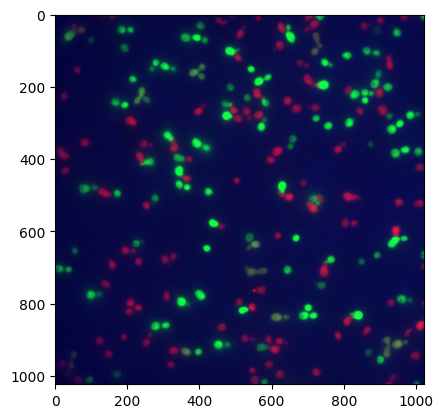

In [32]:

test_img = 'datasets/test/images/img_3.png'
#show the image

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(test_img)
plt.imshow(img)

results = model.predict(test_img)


In [63]:
print(dir(results[0]))
print( dir( results[0].masks[0]))
print(results[0].masks[0].shape)

mask = mask.reshape(1024,1024)

plt.imshow(mask)

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_keys', 'boxes', 'cpu', 'cuda', 'keypoints', 'masks', 'names', 'new', 'numpy', 'obb', 'orig_img', 'orig_shape', 'path', 'plot', 'probs', 'save', 'save_crop', 'save_dir', 'save_txt', 'show', 'speed', 'summary', 'to', 'tojson', 'update', 'verbose']
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__su

ValueError: cannot reshape array of size 1 into shape (1024,1024)

image 1/1 /home/dmoi/projects/yeast_fusion_segmenter/datasets/test/images/img_48.png: 1024x1024 8 fs, 35 hs, 8 ls, 63.6ms
Speed: 20.1ms preprocess, 63.6ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)
(1024, 1024, 3)


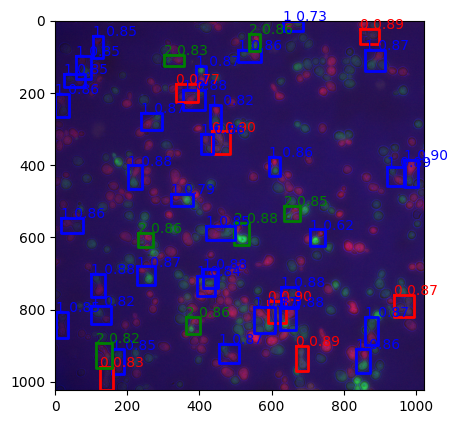

    class     proba          x1          y1           x2           y2  \
0       1  0.904238  965.659668  384.479492  1004.721436   460.709534   
1       0  0.900981  435.720520  306.163879   483.507019   369.774597   
2       0  0.900099  591.257812  776.596802   639.287109   836.778198   
3       0  0.897092  843.590759   21.342781   898.528137    62.927216   
4       0  0.892946  668.190186  901.330200   701.794189   969.600708   
5       1  0.892361  920.614502  403.586792   968.630981   457.821655   
6       1  0.889786  623.779175  791.654419   668.517212   855.190796   
7       1  0.887082  355.808105  191.346588   415.501404   245.889191   
8       2  0.883564  495.375916  560.716797   537.408875   621.989746   
9       1  0.882554  410.888123  688.062134   451.593811   739.713013   
10      1  0.882310  203.389526  400.601807   239.835938   466.458374   
11      1  0.880511  100.116928  700.053833   138.938019   765.930176   
12      1  0.880470  625.562195  737.541016   673.2

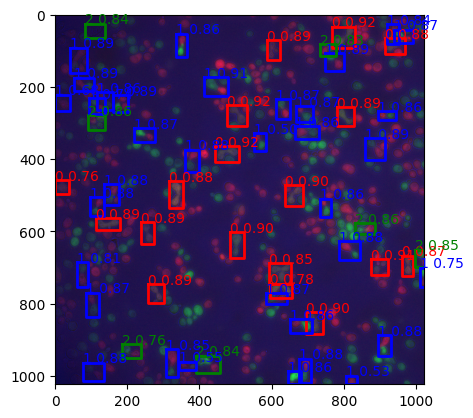

    class     proba           x1          y1           x2           y2  \
0       0  0.926349   444.406067  363.709442   510.741028   406.396759   
1       0  0.923221   766.847839   32.457314   829.883362    92.303429   
2       0  0.920087   477.768738  249.982056   533.144836   307.373657   
3       0  0.915996   876.166016  676.743530   922.265625   720.621338   
4       1  0.913102   412.384766  173.239777   478.377686   223.431000   
5       0  0.909114   638.407593  472.514282   688.385620   529.118835   
6       0  0.907649   696.284546  823.741821   742.545288   883.424561   
7       0  0.901499   485.679443  601.992310   522.273315   674.312378   
8       0  0.899597   779.845825  255.861267   828.878906   308.373108   
9       1  0.899221    40.449703   91.327576    88.677795   159.916382   
10      0  0.898776   586.055664   70.608383   622.338135   125.869431   
11      0  0.896002   114.096115  563.805725   180.064804   597.150818   
12      1  0.895491    53.660057  174.

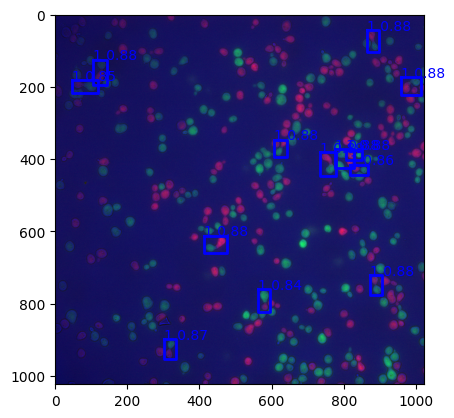

    class     proba          x1          y1           x2          y2  \
0       1  0.890237  734.227051  381.238983   777.209229  445.209442   
1       1  0.889969  776.357178  372.445984   828.543213  423.418396   
2       1  0.888575  607.230103  345.954529   643.166382  394.843689   
3       1  0.886707  413.484100  611.616394   475.451996  660.103210   
4       1  0.885878  864.015930   43.119228   897.584167  103.427643   
5       1  0.885544  958.016968  172.698959  1013.445435  221.214890   
6       1  0.884884  871.722290  721.101685   905.615845  777.259644   
7       1  0.881746  106.057312  124.417130   143.623169  194.821091   
8       1  0.881335  805.545349  373.980377   851.805481  403.284332   
9       1  0.872805  303.016541  899.224609   335.113281  954.596191   
10      1  0.867339  818.501587  414.616974   867.929810  443.392487   
11      1  0.854587   47.797318  181.452179   120.251328  215.918854   
12      1  0.849953  563.295837  760.406128   594.763733  822.45

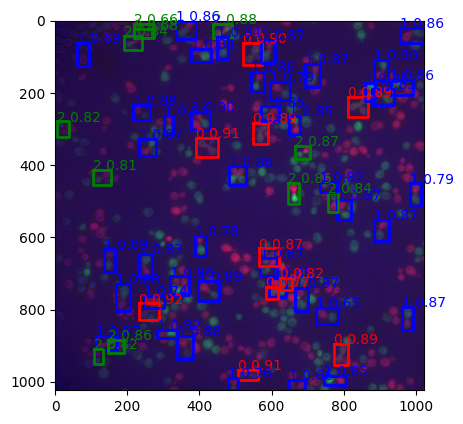

    class     proba          x1          y1          x2           y2  \
0       0  0.927656  232.636734  782.789368  287.885498   828.907410   
1       0  0.916811  390.074158  325.084015  451.401184   376.927460   
2       0  0.910002  506.686462  966.327942  561.409729   995.005554   
3       1  0.903138  377.306213  251.909790  429.735657   302.013611   
4       0  0.901998  521.787720   61.244617  572.201294   122.544418   
..    ...       ...         ...         ...         ...          ...   
58      1  0.694379   61.204018   60.123367   93.708977   126.039154   
59      2  0.689710  219.993073   23.590599  269.136719    48.163521   
60      2  0.669992  219.571960    7.975109  272.893311    48.546459   
61      1  0.660517  648.543945  995.832214  693.357910  1023.813171   
62      1  0.654985  721.933716  795.256836  783.632202   840.098999   

      bf_mean      bf_std  bf_min  bf_max  ...   rfp_mean      rfp_std  \
0   36.908333  510.830014       6     121  ...  39.394444   7

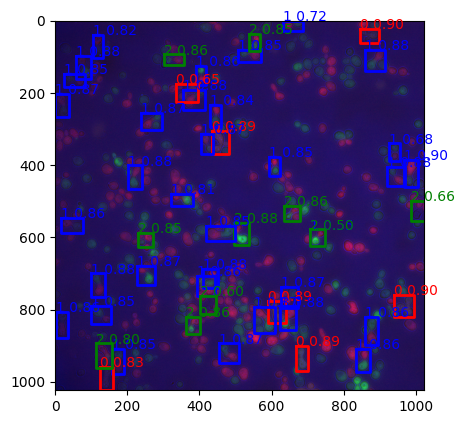

    class     proba          x1          y1           x2           y2  \
0       0  0.902214  843.970459   21.238251   898.644409    62.382614   
1       0  0.901185  939.176636  759.730408   994.106812   819.898621   
2       1  0.900438  965.585083  384.440155  1004.763550   460.585175   
3       0  0.897934  591.308716  776.275757   639.362671   836.617920   
4       0  0.896592  668.110168  901.141846   701.506165   969.554932   
5       0  0.890386  435.616089  305.591736   482.503662   369.716309   
6       1  0.889533  355.828125  191.558868   415.426086   245.632599   
7       2  0.889388  495.386963  560.554138   537.524170   622.171204   
8       1  0.887656  624.218140  791.378418   668.436890   855.257568   
9       1  0.887389  859.111145   80.334244   913.562317   139.412445   
10      1  0.884674  410.610229  688.117554   451.573486   739.599976   
11      1  0.884046  921.058350  403.986725   968.612305   457.530182   
12      1  0.882663  203.520264  400.579224   239.8

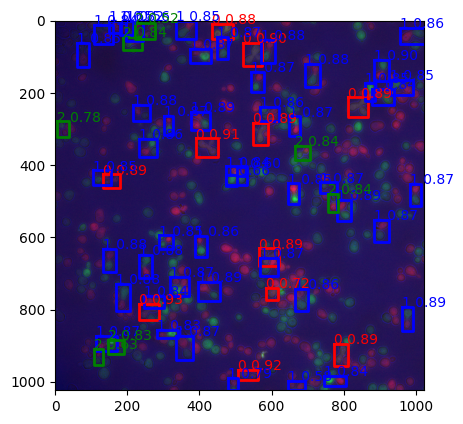

    class     proba          x1          y1          x2           y2  \
0       0  0.932367  232.670197  783.877808  288.408051   829.743530   
1       0  0.923457  506.143372  966.787598  561.961243   996.331909   
2       0  0.910682  389.585907  325.785004  451.078522   377.402802   
3       1  0.904961  883.612305  108.048080  924.356445   166.585495   
4       0  0.900767  521.109131   61.692642  572.930420   124.178391   
..    ...       ...         ...         ...         ...          ...   
61      2  0.639071  107.551193  909.353027  133.092880   953.862061   
62      1  0.602842  504.587097  405.940674  528.654602   430.708252   
63      1  0.585424  645.440063  996.464355  693.143921  1023.737793   
64      1  0.568406  196.166016    0.350708  243.512573    55.010300   
65      2  0.527407  220.299591    6.794563  276.913879    49.187500   

      bf_mean       bf_std  bf_min  bf_max  ...   rfp_mean      rfp_std  \
0   42.223039   875.475930       9     126  ...  42.000000  

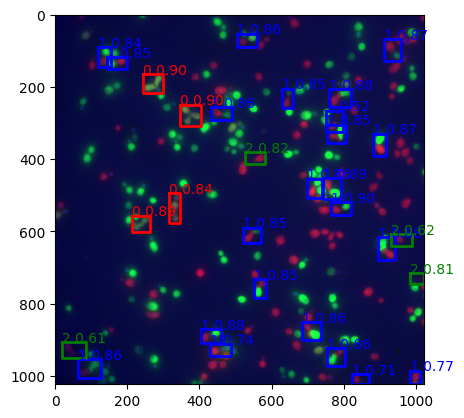

    class     proba          x1          y1           x2           y2  \
0       1  0.903639  763.937012  518.176636   819.504395   554.736450   
1       0  0.902476  346.927490  248.824738   405.247437   308.125336   
2       0  0.902375  243.114471  165.114807   298.953156   215.359863   
3       0  0.896265  212.697601  556.437561   263.665344   600.697571   
4       1  0.891456  742.279297  452.078156   791.594849   509.690094   
5       1  0.889132  403.360474  870.935791   459.360840   909.973511   
6       1  0.886443  894.043213  616.507324   943.210938   679.343994   
7       1  0.881772  759.270020  205.446594   819.989990   256.590149   
8       1  0.879782  881.947754  328.989624   917.457764   390.135254   
9       1  0.871900  911.011108   67.872925   958.838745   126.716888   
10      1  0.869820  504.961792   52.182098   558.765625    89.288025   
11      1  0.869168  699.291687  453.731750   739.170227   506.316711   
12      1  0.866867  684.044556  851.302673   736.2

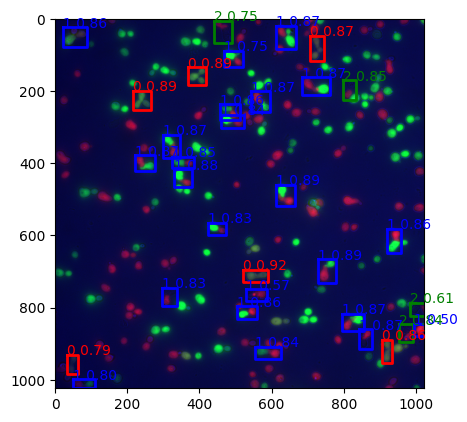

    class     proba          x1          y1           x2           y2  \
0       0  0.926327  521.561157  694.998169   590.941772   730.255737   
1       1  0.899817  613.195190  459.633179   664.025146   519.625244   
2       0  0.898218  367.741943  134.230042   418.962219   184.137817   
3       0  0.897278  215.955811  198.816833   266.619873   251.648407   
4       1  0.894020  728.600464  666.088501   777.465454   730.960571   
5       1  0.888373  330.014069  417.354553   380.176117   467.038269   
6       1  0.879046  543.858276  200.673065   596.758179   258.964264   
7       1  0.878119  684.848694  162.090576   761.579651   211.040985   
8       0  0.877548  706.421448   46.914749   743.845520   118.068192   
9       1  0.875277  612.694885   19.162071   668.093079    83.153511   
10      1  0.874647  794.194092  817.687317   855.599365   865.829773   
11      1  0.874504  297.813538  321.416138   345.300110   385.240845   
12      1  0.872746  842.766357  860.137756   877.3

<Figure size 640x480 with 0 Axes>

In [79]:
#use model to predict
import numpy as np
import glob
from scipy.stats import describe
import pandas as pd

def predpng(model,imgfile , outcsv ):
    results = model(imgfile ,imgsz=1024 ,  visualize=False)
    classes = results[0].boxes.cls.cpu().numpy()
    proba = results[0].boxes.conf.cpu().numpy()
    xywh = results[0].boxes.xyxy.cpu().numpy()
    masks = results[0].masks.cpu().numpy()

    #output the results
    colors = ['red', 'blue', 'green']
    import matplotlib.pyplot as plt
    img = Image.open(imgfile)
    img = np.array(img)
    print(img.shape)
    resdict = {}
    for i in range(classes.shape[0]):
        if proba[i] > 0.5:
            x1,y1,x2,y2 = xywh[i]

            c = int(classes[i])
            plt.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], color = colors[c], linewidth = 2)
            #only two decimal places
            label = str(c) + ' ' + str(proba[i])[:4]
            plt.text(x1, y1, label, color = colors[c])
            mask = masks[i].numpy().to('cpu').xy[0]
            mask = mask.astype(int)
            # Resize mask to the original image size if necessary            
            bf = img[mask , 0].ravel()
            rfp = img[mask , 1].ravel()
            gfp = img[mask , 2].ravel()
            bf_stats = describe(bf)
            rfp_stats = describe(rfp)
            gfp_stats = describe(gfp)
            #create a dictionary with the results
            bf_stats = { 'bf_mean': bf_stats.mean, 'bf_std': bf_stats.variance, 'bf_min': bf_stats.minmax[0], 'bf_max': bf_stats.minmax[1] , 'bf_skew': bf_stats.skewness }
            rfp_stats = { 'rfp_mean': rfp_stats.mean, 'rfp_std': rfp_stats.variance, 'rfp_min': rfp_stats.minmax[0], 'rfp_max': rfp_stats.minmax[1]  , 'rfp_skew': rfp_stats.skewness }
            gfp_stats = { 'gfp_mean': gfp_stats.mean, 'gfp_std': gfp_stats.variance, 'gfp_min': gfp_stats.minmax[0], 'gfp_max': gfp_stats.minmax[1]  , 'gfp_skew': gfp_stats.skewness }
            resdict[i] = { 'class': c, 'proba': proba[i], 'x1': x1, 'y1': y1, 'x2': x2, 'y2': y2   }
            resdict[i].update(bf_stats)
            resdict[i].update(rfp_stats)
            resdict[i].update(gfp_stats)
    
    plt.imshow(img)
    plt.show()

    plt.savefig(imgfile.replace('.png', '_pred.png'))
    #output to csv
    df = pd.DataFrame.from_dict(resdict , orient= 'index')
    print(df)
    df.to_csv(outcsv)

for img in glob.glob('datasets/test/images/*.png'):
    predpng(model, img , img.replace('.png', '.csv'))


In [80]:
import glob
import shutil

folders = glob.glob('manual_test/*/')
dataset = {}
for folder in folders:
    dataset[folder] = { 'bf': glob.glob(folder + '/BF*.tif') }
    dataset[folder]['gfp'] = glob.glob(folder + '/GFP*.tif')
    dataset[folder]['rfp'] = glob.glob(folder + '/RFP*.tif')
count = 0
for sample in dataset:
    print('loading img')
    img = Image.open(dataset[sample]['bf'][0])
    img = [frame for frame in yield_frames(img,scaler = True , verbose=verbose)]
    print('loading gfp')
    gfp = Image.open(dataset[sample]['gfp'][0])
    gfp = [frame for frame in yield_frames(gfp,scaler = True,verbose=verbose)]
    print('loading rfp')
    rfp = Image.open(dataset[sample]['rfp'][0])
    rfp = [frame for frame in yield_frames(rfp,scaler = True,verbose=verbose)]
    dataset[sample]['stack']= []
    #stack the frames together
    for i in tqdm.tqdm(range(len(img))):
        im = np.stack([img[i], gfp[i], rfp[i]], axis=-1)
        #dataset[sample]['stack_mat'][i] = im
        #im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
        print(sample+'img_'+str(count)+'.png')
        cv2.imwrite(sample+'img_'+str(count)+'.png', im )
        #adjust_brightness_contrast('./datasets/train/images/img_'+str(count)+'.png','./datasets/train/images/img_'+str(count)+'.png')
        dataset[sample]['stack'].append(sample+'img_'+str(count)+'.png')
        count += 1
print(dataset)


loading img
loading gfp


loading rfp


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.87it/s]


manual_test/1/img_0.png
loading img
loading gfp
loading rfp


  0%|                                                                                                                                   | 0/1 [00:00<?, ?it/s]

manual_test/2/img_1.png


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.75it/s]

{'manual_test/1/': {'bf': ['manual_test/1/BF02_Position027.tif'], 'gfp': ['manual_test/1/GFP02_Position027.tif'], 'rfp': ['manual_test/1/RFP02_Position027.tif'], 'stack': ['manual_test/1/img_0.png']}, 'manual_test/2/': {'bf': ['manual_test/2/BF02_Position026.tif'], 'gfp': ['manual_test/2/GFP02_Position026.tif'], 'rfp': ['manual_test/2/RFP02_Position026.tif'], 'stack': ['manual_test/2/img_1.png']}}


In [81]:
print(dataset)

{'manual_test/1/': {'bf': ['manual_test/1/BF02_Position027.tif'], 'gfp': ['manual_test/1/GFP02_Position027.tif'], 'rfp': ['manual_test/1/RFP02_Position027.tif'], 'stack': ['manual_test/1/img_0.png']}, 'manual_test/2/': {'bf': ['manual_test/2/BF02_Position026.tif'], 'gfp': ['manual_test/2/GFP02_Position026.tif'], 'rfp': ['manual_test/2/RFP02_Position026.tif'], 'stack': ['manual_test/2/img_1.png']}}


manual_test/1/
manual_test/1/img_0.png

image 1/1 /home/dmoi/projects/yeast_fusion_segmenter/manual_test/1/img_0.png: 1024x1024 9 fs, 28 hs, 4 ls, 63.7ms
Speed: 5.0ms preprocess, 63.7ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)
(1024, 1024, 3)


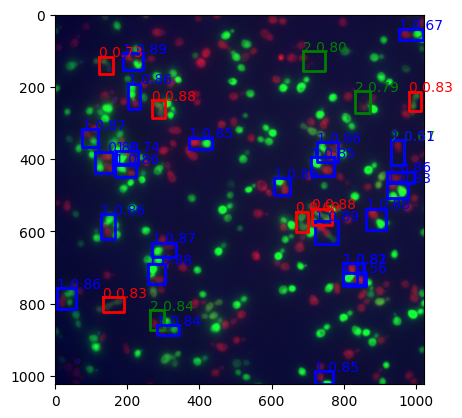

    class     proba          x1          y1           x2           y2  \
0       1  0.899891  189.548492  105.301704   242.597473   152.015015   
1       1  0.892778  720.326050  570.226562   783.568726   635.992188   
2       1  0.891528  606.925049  452.159180   649.962402   500.445190   
3       0  0.886095  268.319855  236.267136   305.488129   285.952332   
4       1  0.883524  110.532578  379.285767   160.438034   438.681458   
5       0  0.882696  713.091309  536.698853   766.563721   582.460083   
6       1  0.882489  862.833984  536.564209   917.303955   596.737305   
7       1  0.880813  256.692535  689.875000   304.367767   747.018555   
8       1  0.875848   73.844879  317.220825   120.228699   365.304565   
9       1  0.875685  270.014404  631.235168   334.792786   671.117615   
10      1  0.869391  127.641365  552.334839   165.307312   621.700562   
11      1  0.868072    4.878197  756.773682    57.862999   814.279785   
12      1  0.867138  919.966980  434.794128   994.9

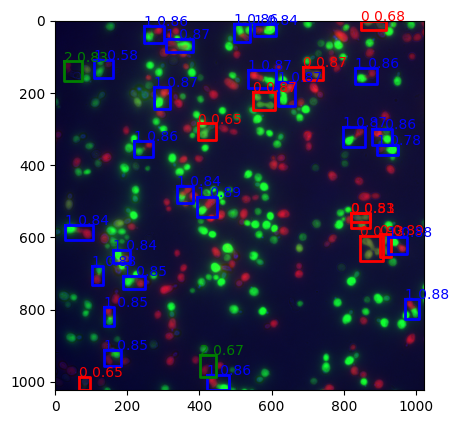

    class     proba          x1          y1           x2           y2  \
0       0  0.935014  845.729492  596.218628   908.124512   665.298950   
1       1  0.896522  392.710876  487.094360   448.239929   542.539307   
2       0  0.893695  899.638428  591.873901   929.885132   654.165405   
3       1  0.889150  922.820679  597.682007   976.238403   645.077515   
4       1  0.888164  970.333496  771.246338  1008.167725   825.007568   
5       1  0.886426  101.082458  678.578674   134.133789   732.512878   
6       1  0.879427  535.672852  136.858459   612.029053   185.097168   
7       0  0.879084  547.422119  197.856171   609.748291   247.262085   
8       0  0.878409  686.352661  127.000549   742.913452   164.348511   
9       1  0.877560  616.763062  169.786926   663.831177   237.205261   
10      1  0.876301  306.635742   49.750664   381.383667    85.946175   
11      1  0.874345  799.181274  294.774353   858.135132   348.951477   
12      1  0.870239  274.108124  183.293274   317.5

<Figure size 640x480 with 0 Axes>

In [82]:
for sample in dataset:
    print(sample)
    for img in dataset[sample]['stack']:
        print(img)
        
        predpng(model, img , img.replace('.png', '.csv'))

./validation/mprm1-mprm1-entr/GFP_Position007.tif
(1024, 1376, 3)


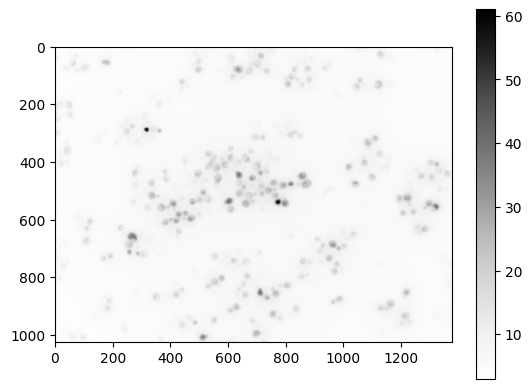

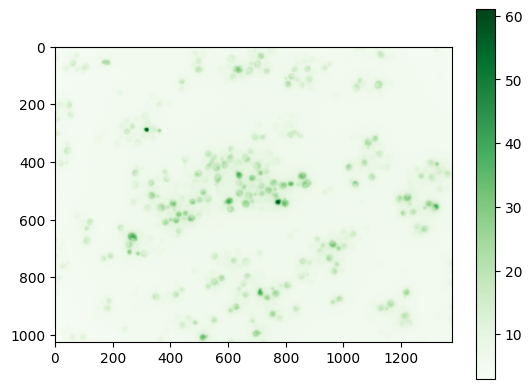

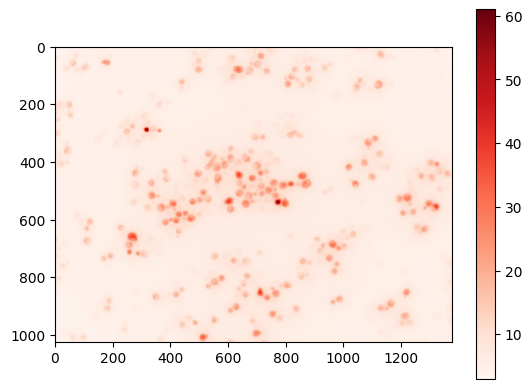

In [25]:
import glob
import cv2
from matplotlib import pyplot as plt
functional_testing_set = glob.glob('./validation/mprm1-mprm1-entr/*.tif' )
print( functional_testing_set[0 ] )
print(cv2.imread(functional_testing_set[0 ]).shape)

cscheme = [ 'Greys' , 'Greens', 'Reds' ]
sample = cv2.imread(functional_testing_set[0 ])
for channel in range(sample.shape[2] ):
    plt.imshow(sample[:,:,channel] , cmap = cscheme[channel])
    plt.colorbar()
    plt.show()

In [26]:
import pickle
#my_model = YOLO('yolov8n-seg_yfusion.pt')
my_model = YOLO('yolov8n-seg_yfusion.pt')

#my_model = model
def scaleimg(imgfile):
    #scale each input channel
    im = cv2.imread(imgfile)
    for d in range(im.shape[2]):
        page = im[:,:,d]
        page = (page - page.min()) / (page.max() - page.min()) * 255
        im[:,:,d] = page
    #im = cv2.cvtColor(im, cv2.COLOR_RGB2BGR)
    cv2.imwrite(imgfile +'_scaled.png', im )
    adjust_brightness_contrast(imgfile +'_scaled.png',imgfile +'_scaled.png')
    
    return imgfile +'_scaled.png'

functional_testing_set = glob.glob('./validation/mprm1-mprm1-entr/*.tif' )
predinput = [scaleimg(i) for i in functional_testing_set ]
results = { img:my_model( img , conf=0.0) for img in predinput }
with open( 'functional_test.pkl' , 'wb' ) as resout:
    resout.write( pickle.dumps( results ))


image 1/1 /home/dmoi/projects/yeast_fusion_segmenter/validation/mprm1-mprm1-entr/GFP_Position007.tif_scaled.png: 480x640 32 fs, 231 hs, 37 ls, 51.1ms
Speed: 1.8ms preprocess, 51.1ms inference, 55.2ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/dmoi/projects/yeast_fusion_segmenter/validation/mprm1-mprm1-entr/RFP_Position001.tif_scaled.png: 480x640 33 fs, 202 hs, 65 ls, 34.4ms
Speed: 1.7ms preprocess, 34.4ms inference, 51.7ms postprocess per image at shape (1, 3, 480, 640)



OutOfMemoryError: CUDA out of memory. Tried to allocate 352.00 MiB. GPU 0 has a total capacity of 7.77 GiB of which 350.75 MiB is free. Process 1810432 has 636.00 MiB memory in use. Process 2695606 has 2.80 GiB memory in use. Including non-PyTorch memory, this process has 3.98 GiB memory in use. Of the allocated memory 3.49 GiB is allocated by PyTorch, and 310.62 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [6]:
print(results.keys())

dict_keys(['./validation/mprm1-mprm1-entr/GFP_Position007.tif_scaled.png', './validation/mprm1-mprm1-entr/RFP_Position001.tif_scaled.png', './validation/mprm1-mprm1-entr/GFP_Position001.tif_scaled.png', './validation/mprm1-mprm1-entr/BF_Position001.tif_scaled.png', './validation/mprm1-mprm1-entr/RFP_Position005.tif_scaled.png', './validation/mprm1-mprm1-entr/BF_Position005.tif_scaled.png', './validation/mprm1-mprm1-entr/BF_Position010.tif_scaled.png', './validation/mprm1-mprm1-entr/GFP_Position005.tif_scaled.png', './validation/mprm1-mprm1-entr/BF_Position007.tif_scaled.png', './validation/mprm1-mprm1-entr/RFP_Position009.tif_scaled.png', './validation/mprm1-mprm1-entr/GFP_Position010.tif_scaled.png', './validation/mprm1-mprm1-entr/RFP_Position007.tif_scaled.png'])


In [19]:
from matplotlib import patches
import tqdm

def add_rect(h,w,x,y , ax , color = 'r', label= '' ):
    # Create a Rectangle patch
    rect = patches.Rectangle((y,x), h, w, linewidth=3, edgecolor=color, facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    if len(label) > 0:
        ax.text(y - 20, x - 20 , label , )
    return ax

def plot_res(pred, imgfile):
    
    img = pred[0].orig_img
    boxes = pred[0].boxes.xywh.detach().cpu()
    c = pred[0].boxes.cls.detach().cpu()
    print(boxes)
    fig,axes = plt.subplots(nrows=1, figsize=(20,20)  , ncols=3)

    
    cscheme = [ 'Greys' , 'Greens', 'Reds' ]
    sample = cv2.imread(imgfile)
    
    for channel in range(img.shape[2] ):
        axes[channel].imshow(sample[:,:,channel] , cmap = cscheme[channel])
    for row in tqdm.tqdm(range(boxes.shape[0])):
        x,y,w,h = list( boxes[row,: ] )
        cstr = str(c[row])
        label = str( c[row] )
        for ax in list(axes):
            ax = add_rect(h=h,w=w,x=x,y=y , ax=ax , color = 'r', label= cstr )
    plt.show()


def output_pred(imgfile,my_model=my_model):
    results = list(my_model(imgfile, conf=0.01))
    plot_res(results, imgfile)

In [15]:
#visualize predicitions for the validation set
import random
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tqdm 

#my_model = YOLO('runs/segment/train21/weights/best.pt')
my_model = YOLO('runs/segment/train21/weights/best.pt')
results = list(my_model('datasets/test/images/img_57.png', conf=0.0))
result = np.asarray( results[0].conf.detach())
def retdf(model, predfile):
    resdict = { i:{ c:result[row,i] for i,c in enumerate(classes) } for i in result.shape[0] }
    resdf = pd.DataFrame(resdict)
    resdf['file'] = predfile
    return resdf

predfiles = glob.glob('*/')
global_resdf =  pd.concat([ retdf(my_model(imgfile, conf=0.0) ) for imgfile in tqdm.tdm(predfiles) ])

print(global_resdf )

FileNotFoundError: [Errno 2] No such file or directory: 'runs/segment/train21/weights/best.pt'

In [16]:
print(results)

{}


In [17]:
from IPython.display import Image as show_image
show_image(filename="runs/segment/train5/val_batch0_labelsYOLOjpg")

show_image(filename="runs/segment/train5/MaskP_curve.png")

show_image(filename="runs/segment/train5/results.png")



ValueError: Cannot embed the 'runs/segment/train5/val_batch0_labelsyolojpg' image format

In [ ]:
#augment dataset and dump to disk in pt format
